#1.Introducción
##Propósito
El propósito de esta etapa es proporcionar una visión general del proyecto y los objetivos del análisis de datos, explicando el contexto del conjunto de datos y cómo se relaciona con el objetivo comercial de Elo. La exploración y comprensión de los datos de las transacciones y las características de los comercios se realizará para obtener una base sólida que permita un análisis más profundo y, finalmente, la construcción de modelos predictivos que mejoren la experiencia del usuario mediante recomendaciones personalizadas.

Este análisis tiene los siguientes objetivos específicos:

1. Comprender el contexto del negocio: Entender cómo Elo está trabajando con comerciantes y clientes, y cómo las promociones y descuentos pueden impactar la fidelización del cliente.

2. Revisar la calidad y la estructura de los datos: Asegurar que los datos sean adecuados para el modelado posterior y detectar posibles problemas como valores faltantes, errores o anomalías.

3. Explorar las relaciones clave entre variables: Identificar patrones y relaciones entre las variables para comprender qué características son más relevantes para la predicción del "Loyalty score".

4. Identificar oportunidades de mejora y refinamiento de los datos: Encontrar áreas en las que los datos puedan mejorarse o transformarse para obtener una mayor precisión en los modelos predictivos.

##Objetivos del negocio:
###Objetivo General:
Desarrollar un sistema de recomendación basado en machine learning que permita predecir el nivel de lealtad futura de los tarjetahabientes, con el fin de mejorar la personalización de promociones y maximizar el retorno para comercios aliados.

###Objetivos Específicos
1. Identificar patrones de comportamiento de compra que influyen en la lealtad de los clientes.
2. Anticipar el score de lealtad futura de los tarjetahabientes con base en sus transacciones anteriores.
3. Mejorar la eficiencia en la asignación de promociones comerciales personalizadas.
4. Incrementar la recurrencia de consumo en clientes con alta lealtad estimada.
5. Incorporar el score de lealtad como insumo recurrente en los procesos de toma de decisiones comerciales.

##Objetivos de minería (Pendiente)

##Archivos:
- train.csv: el conjunto de entrenamiento
- test.csv: el conjunto de prueba
- historical_transactions.csv: hasta 3 meses de transacciones históricas para cada card_id
- new_merchant_transactions.csv: dos meses de datos para cada card_id que contienen TODAS las compras realizadas por card_id en merchant_ids que no se vieron en los datos históricos.
- merchants.csv: información adicional sobre todos los comercios/commerce_ids del conjunto de datos.

#2.Carga de los Datos

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
from google.colab import files
uploaded = files.upload()


In [5]:
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
# Carga de datasets
vdf_train = pd.read_csv('src/train.csv')
vdf_test = pd.read_csv('src/test.csv')
vdf_hist_trans = pd.read_csv('src/historical_transactions.csv')
vdf_new_trans = pd.read_csv('src/new_merchant_transactions.csv')
vdf_merchants = pd.read_csv('src/merchants.csv')

In [ ]:
# Visualización básica de las dimensiones, columnas, tipos de datos y primeras filas (head()).
vdf_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [ ]:
vdf_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [11]:
vdf_hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
vdf_new_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
vdf_merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


#3.Descripción General de los Datos

## train.csv: descripción de variables, distribución del target (score de lealtad).
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta único|
|`first_active_month` |'AAAA-MM', mes de la primera compra|
|`feature_1` |Característica categórica de la tarjeta anonimizada|
|`feature_2` |Característica categórica de la tarjeta anonimizada|
|`feature_3` |Característica categórica de la tarjeta anonimizada|
|`target` |Puntuación numérica de fidelidad calculada 2 meses después del período histórico y de evaluación|

##test.csv: estructura y comparación con train.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta único|
|`first_active_month` |'AAAA-MM', mes de la primera compra|
|`feature_1` |Característica categórica de la tarjeta anonimizada|
|`feature_2` |Característica categórica de la tarjeta anonimizada|
|`feature_3` |Característica categórica de la tarjeta anonimizada|

##historical_transactions.csv: cantidad de registros por tarjeta, valores típicos.
|Header |  Definition|
|---|---------|
|`merchant_id`|Identificador único de comerciante|
|`merchant_group_id` |Grupo de comerciantes (anónimo)|
|`merchant_category_id` |Identificador único para la categoría del comerciante (anonimizado)|
|`subsector_id` |Grupo de categorías de comerciantes (anonimizado)|
|`numerical_1` |medida anónima|
|`numerical_2` |medida anónima|
|`category_1` |categoría anónima|
|`most_recent_sales_range` |Rango de ingresos (unidades monetarias) en el último mes activo --> A > B > C > D > E|
|`most_recent_purchases_range` |Rango de cantidad de transacciones en el último mes activo --> A > B > C > D > E|
|`avg_sales_lag3` |Promedio mensual de ingresos en los últimos 3 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag3` |Promedio mensual de transacciones en los últimos 3 meses dividido por las transacciones en el último mes activo|
|`active_months_lag3` |Cantidad de meses activos en los últimos 3 meses|
|`avg_sales_lag6` |Promedio mensual de ingresos en los últimos 6 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag6` |Promedio mensual de transacciones en los últimos 6 meses dividido por las transacciones en el último mes activo|
|`active_months_lag6` |Cantidad de meses activos en los últimos 6 meses|
|`avg_sales_lag12` |Promedio mensual de ingresos en los últimos 12 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag12` |Promedio mensual de transacciones en los últimos 12 meses dividido por las transacciones en el último mes activo|
|`active_months_lag12` |Cantidad de meses activos en los últimos 12 meses|
|`category_4` |categoría anónima|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

##new_merchant_transactions.csv: análisis similar al histórico.
|Header |  Definition|
|---|---------|
|`merchant_id`|Identificador único de comerciante|
|`merchant_group_id` |Grupo de comerciantes (anónimo)|
|`merchant_category_id` |Identificador único para la categoría del comerciante (anonimizado)|
|`subsector_id` |Grupo de categorías de comerciantes (anonimizado)|
|`numerical_1` |medida anónima|
|`numerical_2` |medida anónima|
|`category_1` |categoría anónima|
|`most_recent_sales_range` |Rango de ingresos (unidades monetarias) en el último mes activo --> A > B > C > D > E|
|`most_recent_purchases_range` |Rango de cantidad de transacciones en el último mes activo --> A > B > C > D > E|
|`avg_sales_lag3` |Promedio mensual de ingresos en los últimos 3 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag3` |Promedio mensual de transacciones en los últimos 3 meses dividido por las transacciones en el último mes activo|
|`active_months_lag3` |Cantidad de meses activos en los últimos 3 meses|
|`avg_sales_lag6` |Promedio mensual de ingresos en los últimos 6 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag6` |Promedio mensual de transacciones en los últimos 6 meses dividido por las transacciones en el último mes activo|
|`active_months_lag6` |Cantidad de meses activos en los últimos 6 meses|
|`avg_sales_lag12` |Promedio mensual de ingresos en los últimos 12 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag12` |Promedio mensual de transacciones en los últimos 12 meses dividido por las transacciones en el último mes activo|
|`active_months_lag12` |Cantidad de meses activos en los últimos 12 meses|
|`category_4` |categoría anónima|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

##merchants.csv: cantidad de merchants, categorías, etc.
|Header |  Definition|
|---|---------|
|`merchant_id`|Identificador único de comerciante|
|`merchant_group_id` |Grupo de comerciantes (anónimo)|
|`merchant_category_id` |Identificador único para la categoría del comerciante (anonimizado)|
|`subsector_id` |Grupo de categorías de comerciantes (anonimizado)|
|`numerical_1` |medida anónima|
|`numerical_2` |medida anónima|
|`category_1` |categoría anónima|
|`most_recent_sales_range` |Rango de ingresos (unidades monetarias) en el último mes activo --> A > B > C > D > E|
|`most_recent_purchases_range` |Rango de cantidad de transacciones en el último mes activo --> A > B > C > D > E|
|`avg_sales_lag3` |Promedio mensual de ingresos en los últimos 3 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag3` |Promedio mensual de transacciones en los últimos 3 meses dividido por las transacciones en el último mes activo|
|`active_months_lag3` |Cantidad de meses activos en los últimos 3 meses|
|`avg_sales_lag6` |Promedio mensual de ingresos en los últimos 6 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag6` |Promedio mensual de transacciones en los últimos 6 meses dividido por las transacciones en el último mes activo|
|`active_months_lag6` |Cantidad de meses activos en los últimos 6 meses|
|`avg_sales_lag12` |Promedio mensual de ingresos en los últimos 12 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag12` |Promedio mensual de transacciones en los últimos 12 meses dividido por las transacciones en el último mes activo|
|`active_months_lag12` |Cantidad de meses activos en los últimos 12 meses|
|`category_4` |categoría anónima|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

#4.Análisis Univariado

##4.1.Merchant

In [9]:
# Descripción estadística (describe()) por variable.
vdf_merchants.describe()

c:\Users\LENOVO LOQ\OneDrive\Documentos\Mineria de Datos\Proyecto Met CRIP DM\Proyecto\elo-data-mining\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\LENOVO LOQ\OneDrive\Documentos\Mineria de Datos\Proyecto Met CRIP DM\Proyecto\elo-data-mining\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\LENOVO LOQ\OneDrive\Documentos\Mineria de Datos\Proyecto Met CRIP DM\Proyecto\elo-data-mining\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


<Axes: xlabel='state_id'>

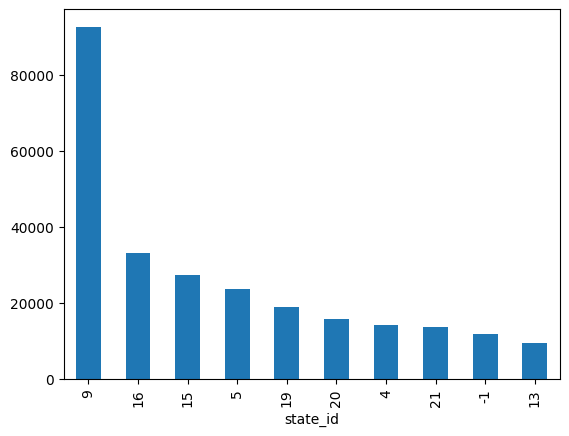

In [10]:
# Distribución del target (histograma, boxplot, etc).
vdf_merchants['city_id'].nunique()
vdf_merchants['state_id'].value_counts().head(10).plot(kind='bar')


4.1.1 Análisis de variables categóricas

Valores únicos en merchant_category_id: 324
merchant_category_id
705    30666
278    17992
307    17528
367    15387
68     14341
80     13520
222    11582
884    10398
683     9175
560     7988
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

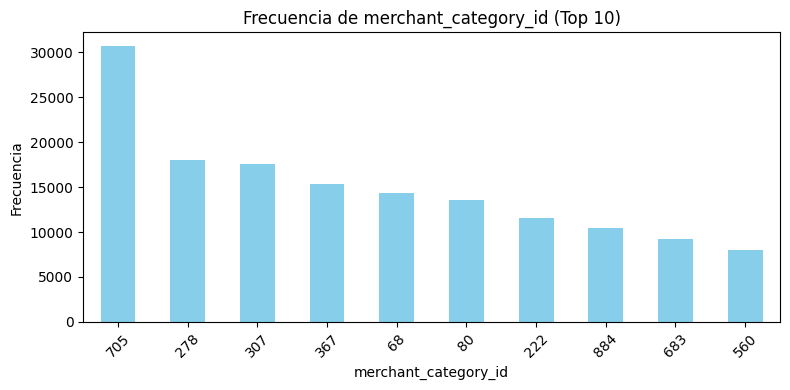

In [11]:
# Distribuciones por tipo de variable (categórica vs numérica).
#Análisis de merchant_category_id
# Número de categorías únicas
print("Valores únicos en merchant_category_id:", vdf_merchants['merchant_category_id'].nunique())

# Frecuencia de las 10 más comunes
print(vdf_merchants['merchant_category_id'].value_counts().head(10))

# Gráfico de barras
vdf_merchants['merchant_category_id'].value_counts().head(10).plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title("Frecuencia de merchant_category_id (Top 10)")
plt.xlabel("merchant_category_id")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show



Valores únicos en subsector_id: 41
subsector_id
27    51678
37    35575
33    30887
34    26533
21    24207
29    21588
19    20361
16    16435
18    14279
20     9528
Name: count, dtype: int64


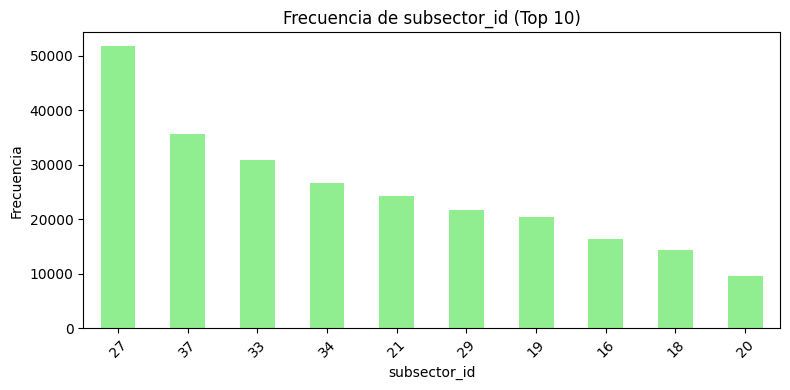

In [ ]:
#Análisis de subsector_id
print("Valores únicos en subsector_id:", vdf_merchants['subsector_id'].nunique())
print(vdf_merchants['subsector_id'].value_counts().head(10))

['subsector_id'].value_counts().head(10).plot(kind='bar', figsize=(8, 4), color='lightgreen')
plt.title("Frecuencia de subsector_id (Top 10)")
plt.xlabel("subsector_id")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribución de most_recent_sales_range:
most_recent_sales_range
E    177104
D    117475
C     34075
B      5037
A      1005
Name: count, dtype: int64


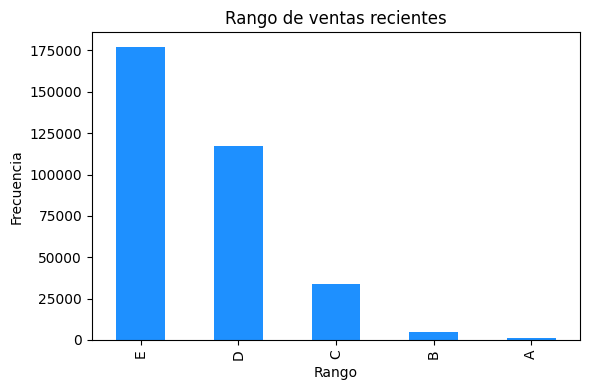

In [ ]:
#Análisis de most_recent_sales_range
orden = ['E', 'D', 'C', 'B', 'A']
ventas = vdf_merchants['most_recent_sales_range'].value_counts().reindex(orden)

print("Distribución de most_recent_sales_range:")
print(ventas)

ventas.plot(kind='bar', figsize=(6, 4), color='dodgerblue')
plt.title("Rango de ventas recientes")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


Distribución de most_recent_purchases_range:
most_recent_purchases_range
E    175309
D    119187
C     34144
B      5046
A      1010
Name: count, dtype: int64


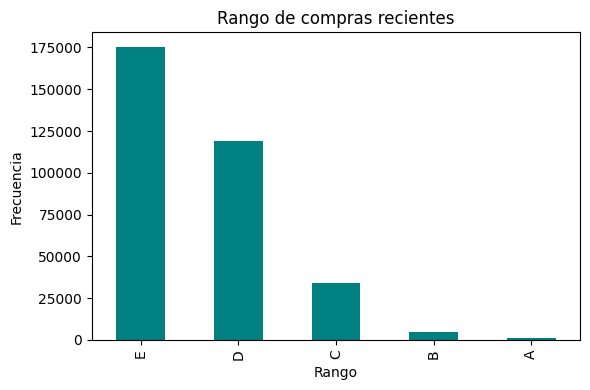

In [ ]:
#Análisis de most_recent_purchases_range
compras = vdf_merchants['most_recent_purchases_range'].value_counts().reindex(orden)

print("Distribución de most_recent_purchases_range:")
print(compras)

compras.plot(kind='bar', figsize=(6, 4), color='teal')
plt.title("Rango de compras recientes")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


**4.1.2 Análisis de variables numéricas**

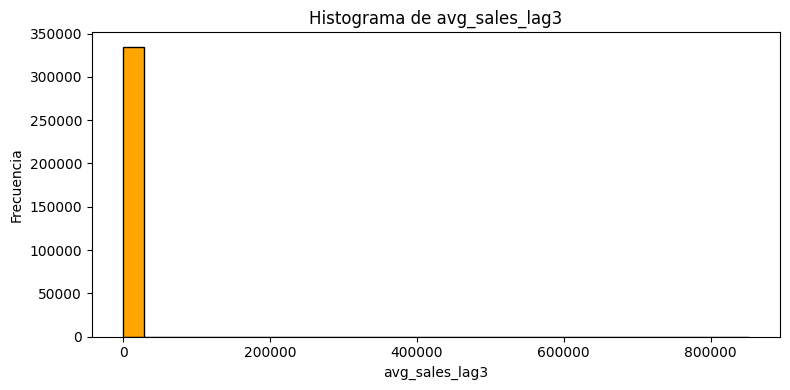

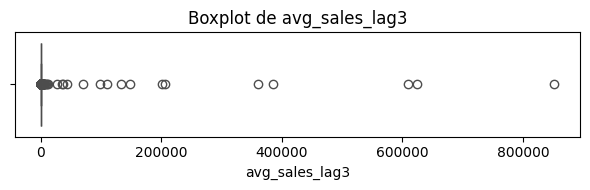

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(vdf_merchants['avg_sales_lag3'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title("Histograma de avg_sales_lag3")
plt.xlabel("avg_sales_lag3")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=vdf_merchants['avg_sales_lag3'], color='orange')
plt.title("Boxplot de avg_sales_lag3")
plt.tight_layout()
plt.show()


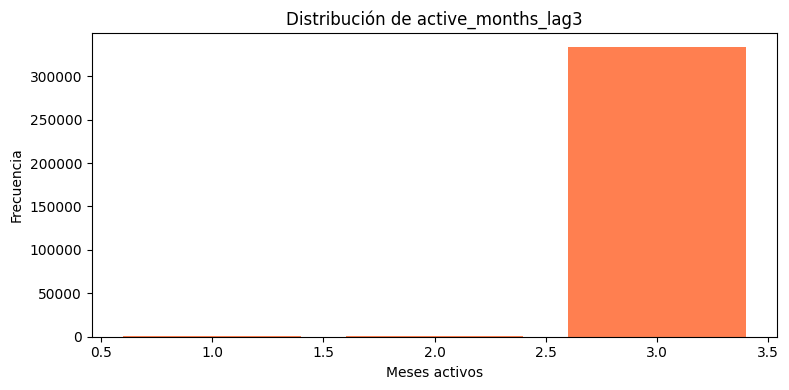

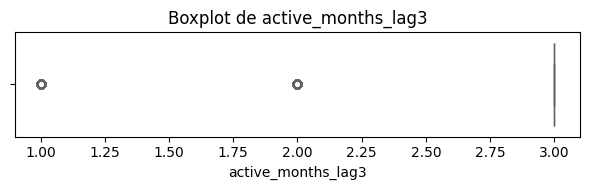

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(vdf_merchants['active_months_lag3'].value_counts().sort_index().index,
        vdf_merchants['active_months_lag3'].value_counts().sort_index().values,
        color='coral')
plt.title("Distribución de active_months_lag3")
plt.xlabel("Meses activos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=vdf_merchants['active_months_lag3'], color='coral')
plt.title("Boxplot de active_months_lag3")
plt.tight_layout()
plt.show()


In [ ]:
# Conteo de valores nulos
vdf_merchants.isnull().sum()


,0
merchant_id,0
merchant_group_id,0
merchant_category_id,0
subsector_id,0
numerical_1,0
numerical_2,0
category_1,0
most_recent_sales_range,0
most_recent_purchases_range,0
avg_sales_lag3,13


In [ ]:
# Conteo total de filas duplicadas
vdf_merchants.duplicated().sum()


0


##4.2.Train

In [ ]:
#Estadísticas básicas
vdf_train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


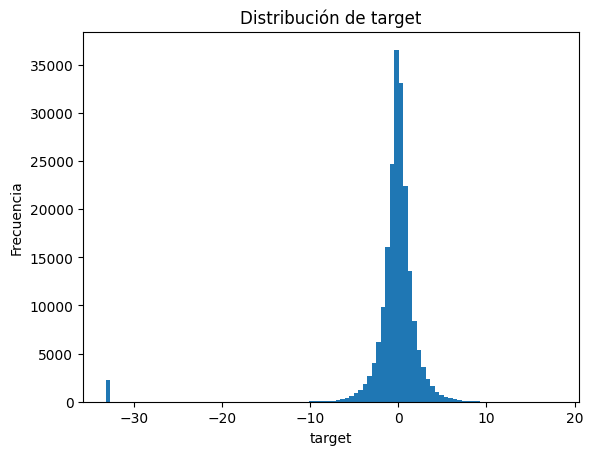

In [ ]:
# Distribución del target (histograma, boxplot, etc).
plt.hist(vdf_train['target'], bins=100)
plt.title('Distribución de target')
plt.xlabel('target')
plt.ylabel('Frecuencia')
plt.show()

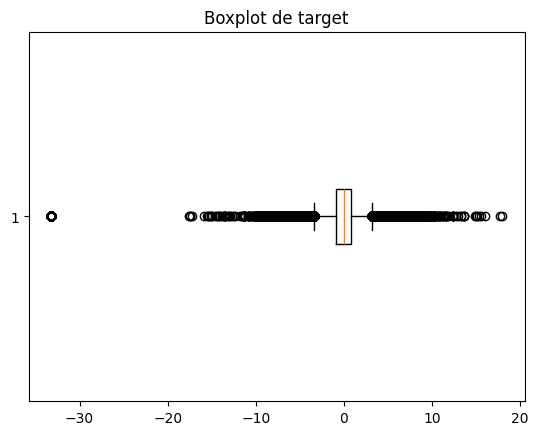

In [ ]:
plt.boxplot(vdf_train['target'], vert=False)
plt.title('Boxplot de target')
plt.show()


Distribución de feature_1:
feature_1
3    73573
2    55797
5    40625
4    19885
1    12037
Name: count, dtype: int64




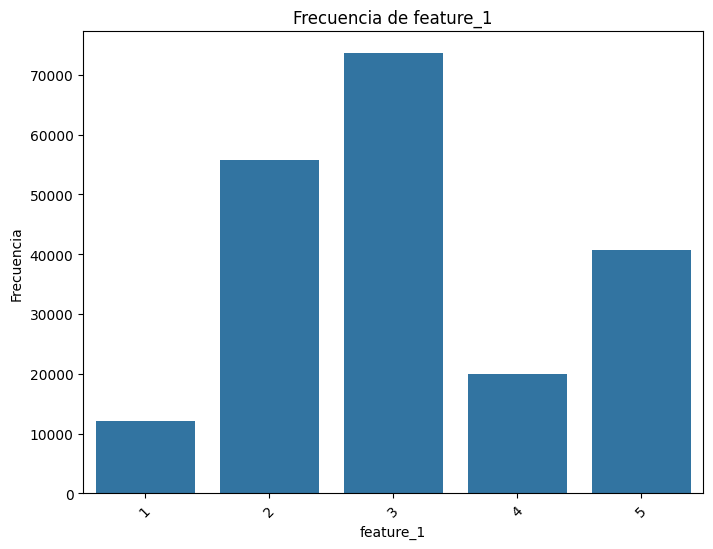

Distribución de feature_2:
feature_2
1    89242
2    74839
3    37836
Name: count, dtype: int64




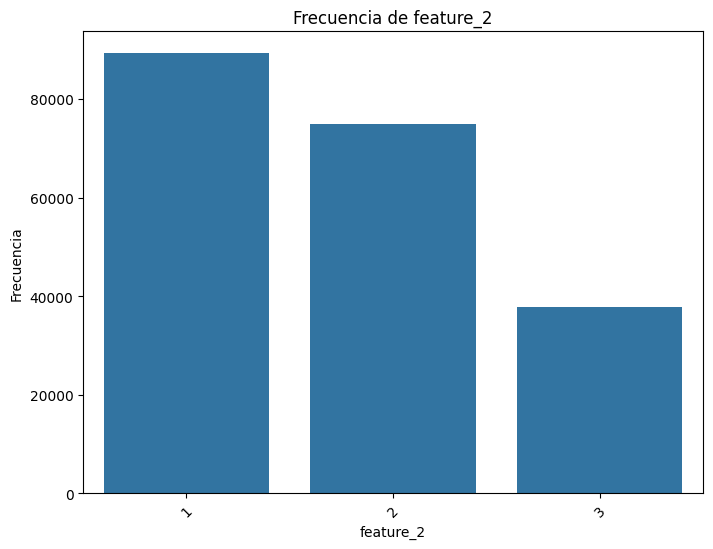

Distribución de feature_3:
feature_3
1    114198
0     87719
Name: count, dtype: int64




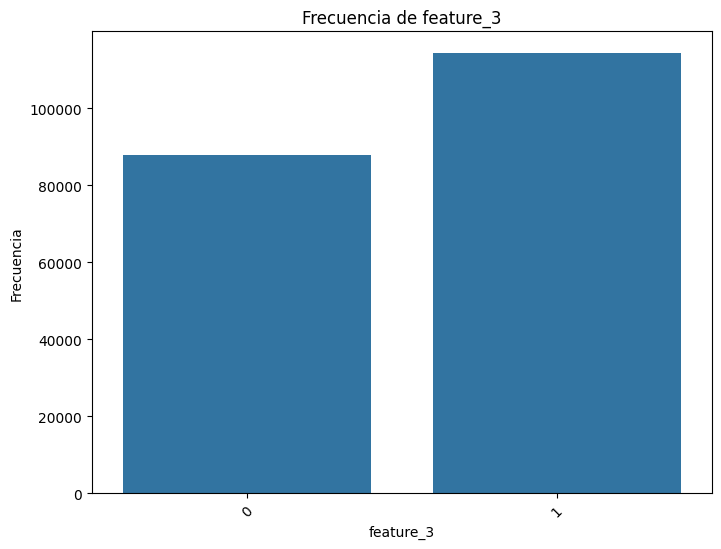

In [ ]:
# Distribuciones de las variables
for feature in ['feature_1', 'feature_2', 'feature_3']:
    print(f"Distribución de {feature}:")
    print(vdf_train[feature].value_counts())
    print("\n")

    plt.figure(figsize=(8, 6))
    sns.countplot(data=vdf_train, x=feature)
    plt.title(f'Frecuencia de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Conteo de valores nulos, duplicados, outliers simples.
print("Número de valores únicos en 'card_id':", vdf_train['card_id'].nunique())
print("¿Existen duplicados en 'card_id'?", vdf_train['card_id'].duplicated().any())

Número de valores únicos en 'card_id': 201917
¿Existen duplicados en 'card_id'? False


##4.3 new_merchant_transactions

In [ ]:
vdf_new_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01



Distribución de category_1:
category_1
N    1899935
Y      63096
Name: count, dtype: int64


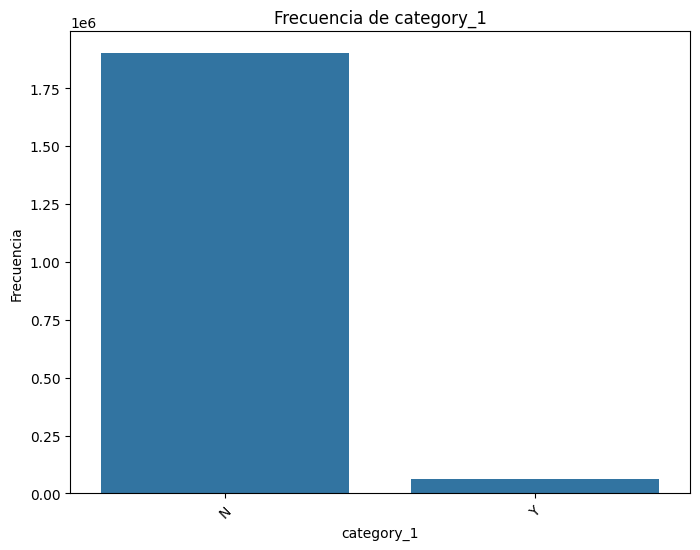


Distribución de category_2:
category_2
1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: count, dtype: int64


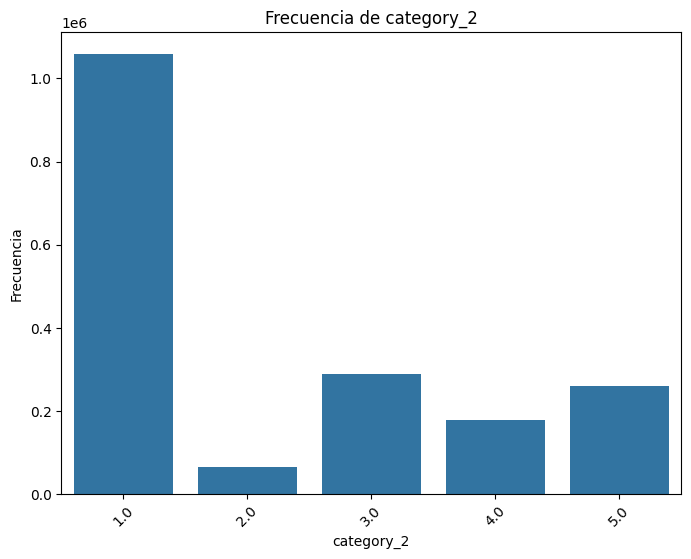


Distribución de category_3:
category_3
A    922244
B    836178
C    148687
Name: count, dtype: int64


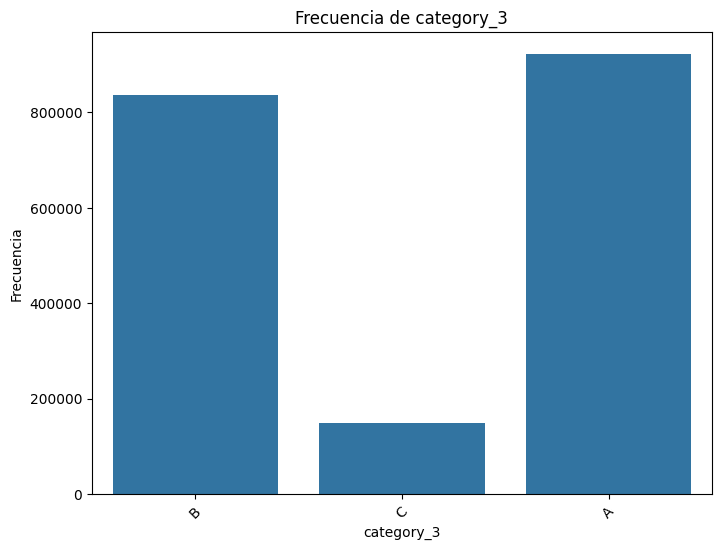

In [ ]:
# Análisis de variables categóricas
categorical_features = ['category_1', 'category_2', 'category_3']

for feature in categorical_features:
    print(f"\nDistribución de {feature}:")
    print(vdf_new_trans[feature].value_counts())

    # Graficar la frecuencia de las categorías
    plt.figure(figsize=(8, 6))
    sns.countplot(data=vdf_new_trans, x=feature)
    plt.title(f'Frecuencia de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


Estadísticas descriptivas de variables numéricas:
       purchase_amount  installments
count     1.963031e+06  1.963031e+06
mean     -5.509690e-01  6.829643e-01
std       6.940043e-01  1.584069e+00
min      -7.468928e-01 -1.000000e+00
25%      -7.166294e-01  0.000000e+00
50%      -6.748406e-01  1.000000e+00
75%      -5.816162e-01  1.000000e+00
max       2.631575e+02  9.990000e+02


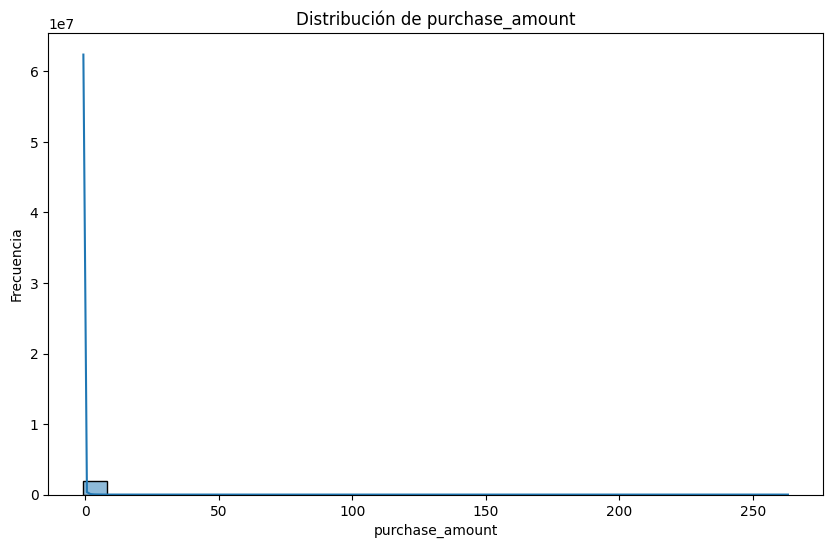

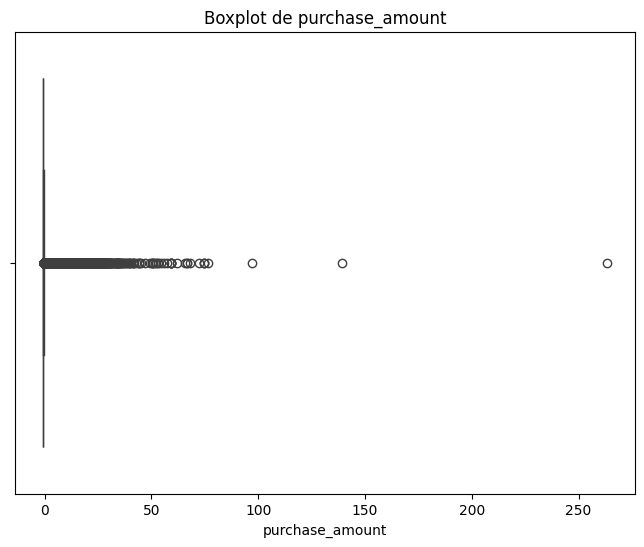

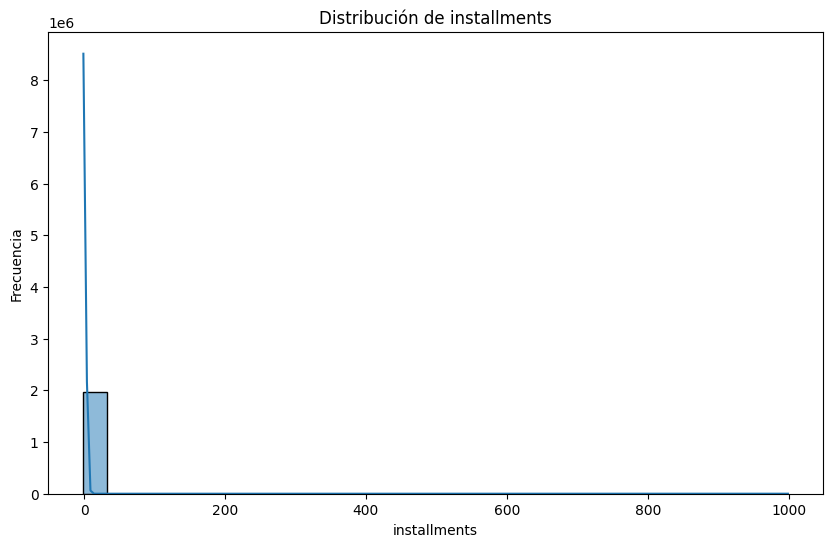

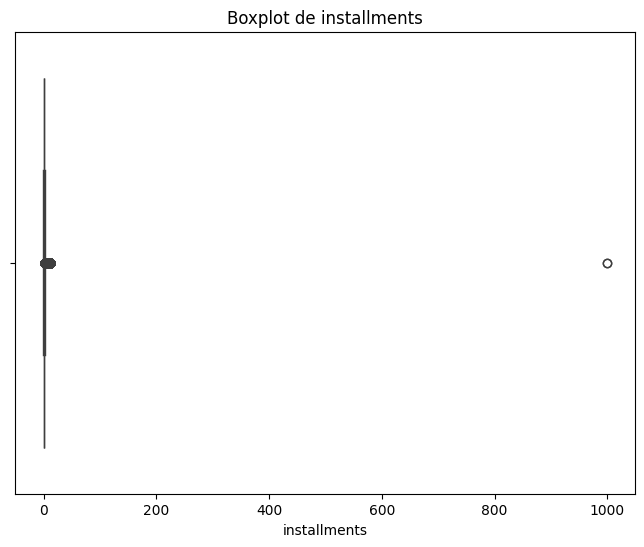

In [ ]:
# Análisis de variables numéricas
numerical_features = ['purchase_amount', 'installments']

# Estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas de variables numéricas:")
print(vdf_new_trans[numerical_features].describe())

# Histogramas y KDE de las variables numéricas
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(vdf_new_trans[feature], kde=True, bins=30)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot para detectar outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=vdf_new_trans[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

In [ ]:
# Verificación de valores nulos
print("\nValores nulos en el conjunto de datos:")
print(vdf_new_trans.isnull().sum())


Valores nulos en el conjunto de datos:
authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64


##4.4 Historical_transactions

In [ ]:
#Análisis de variables categóricas
categorical_features = ['category_1', 'category_2', 'category_4', 'most_recent_sales_range',
                        'most_recent_purchases_range', 'city_id', 'state_id']

# Distribución de las variables categóricas
for feature in categorical_features:
    print(f"\nDistribución de {feature}:")
    print(vdf_hist_trans[feature].value_counts())

    # Graficar la frecuencia de las categorías
    plt.figure(figsize=(8, 6))
    sns.countplot(data=vdf_hist_trans, x=feature)
    plt.title(f'Frecuencia de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


Distribución de category_1:


NameError: name 'vdf_hist_trans' is not defined

In [ ]:
#Análisis de variables numéricas
numerical_features = ['numerical_1', 'numerical_2', 'avg_sales_lag3', 'avg_purchases_lag3',
                      'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6',
                      'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
                      'active_months_lag12']

#Estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas de variables numéricas:")
print(vdf_hist_trans[numerical_features].describe())

#Histogramas y KDE de las variables numéricas
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(vdf_hist_trans[feature], kde=True, bins=30)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot para detectar outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=vdf_hist_trans[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

In [14]:
# Verificación de valores nulos
print("\nValores nulos en el conjunto de datos:")
print(vdf_hist_trans.isnull().sum())


Valores nulos en el conjunto de datos:
authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64


#5.Análisis Multivariado

In [16]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('src/train.csv')
df['first_active_month'] = pd.to_datetime(df['first_active_month'])

# Definir fecha de referencia
fecha_referencia = pd.to_datetime('2018-03-01')  # puede ajustarse si sabes la fecha real de corte

# Calcular la cantidad de meses activos hasta la fecha de referencia
df['meses_actividad'] = (fecha_referencia.to_period('M') - df['first_active_month'].dt.to_period('M')).apply(lambda x: x.n)


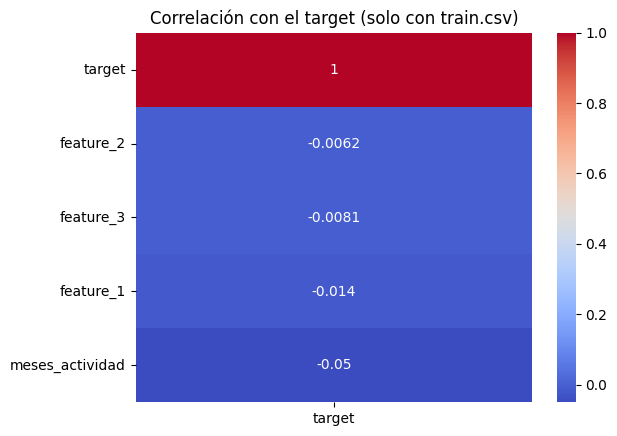

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# columnas numéricas relevantes
corr_cols = ['feature_1', 'feature_2', 'feature_3', 'meses_actividad', 'target']
corr = df[corr_cols].corr()

# Visualizamos la correlación con el target
sns.heatmap(corr[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con el target (solo con train.csv)')
plt.show()


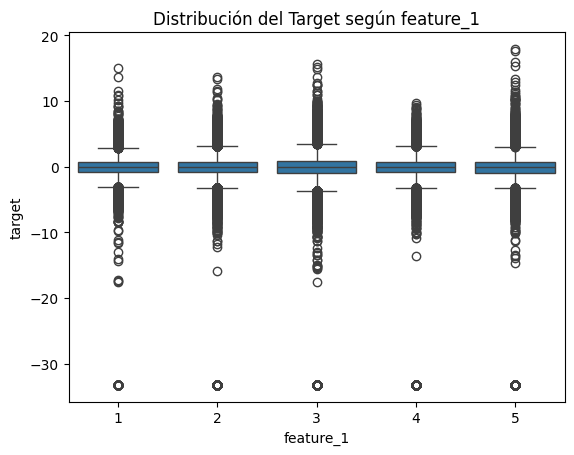

Promedio del Target por feature_1:
feature_1
1   -0.315476
2   -0.350452
3   -0.377533
4   -0.404652
5   -0.499879
Name: target, dtype: float64
--------------------------------------------------


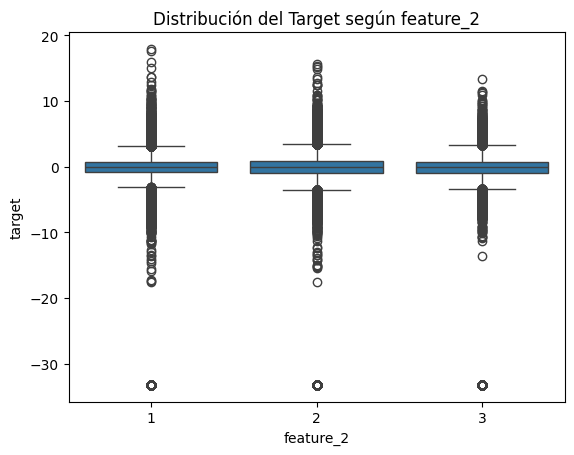

Promedio del Target por feature_2:
feature_2
2   -0.332899
1   -0.398675
3   -0.501889
Name: target, dtype: float64
--------------------------------------------------


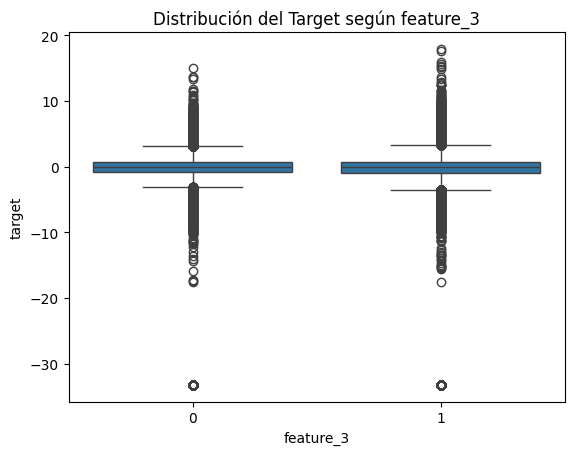

Promedio del Target por feature_3:
feature_3
0   -0.357939
1   -0.421057
Name: target, dtype: float64
--------------------------------------------------


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['feature_1', 'feature_2', 'feature_3']
# Cargar el dataset
train = pd.read_csv('src/train.csv')

for feature in features:
    # Gráfico boxplot
    sns.boxplot(data=train, x=feature, y='target')
    plt.title(f'Distribución del Target según {feature}')
    plt.show()

    # Promedio agrupado por la feature
    print(f"Promedio del Target por {feature}:")
    print(train.groupby(feature)['target'].mean().sort_values(ascending=False))
    print("-" * 50)


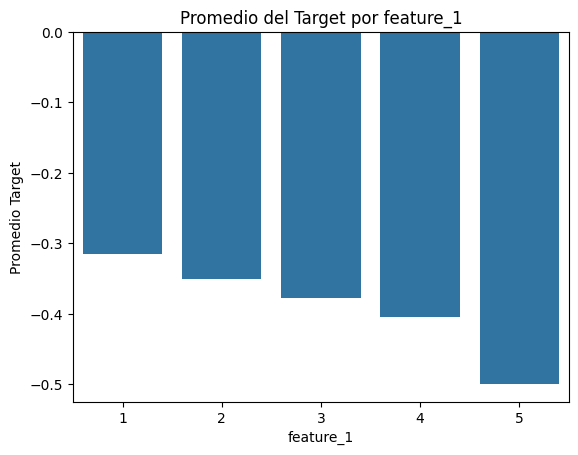

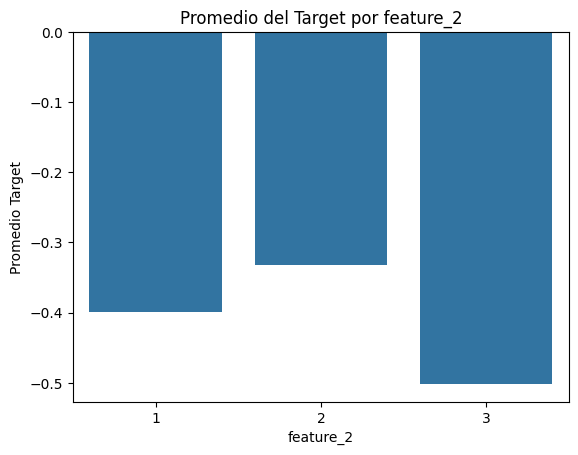

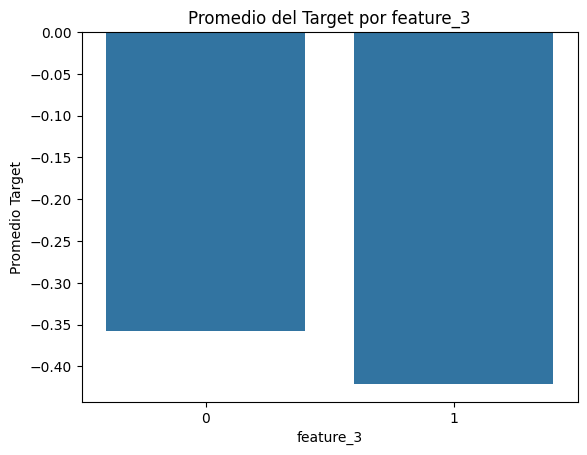

In [ ]:
for feature in features:
    means = train.groupby(feature)['target'].mean().sort_values(ascending=False)
    sns.barplot(x=means.index, y=means.values)
    plt.title(f'Promedio del Target por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Promedio Target')
    plt.show()


In [ ]:
for feature in features:
    summary = train.groupby(feature)['target'].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean', ascending=False)
    print(f"Resumen estadístico del target por {feature}:\n")
    print(summary)
    print("-" * 50)


Resumen estadístico del target por feature_1:

               mean    median       std  count
feature_1                                     
1         -0.315476 -0.011003  3.407106  12037
2         -0.350452  0.000000  3.756032  55797
3         -0.377533 -0.036539  3.834499  73573
4         -0.404652  0.000000  3.817954  19885
5         -0.499879 -0.056208  4.134833  40625
--------------------------------------------------
Resumen estadístico del target por feature_2:

               mean    median       std  count
feature_2                                     
2         -0.332899 -0.045086  3.567683  74839
1         -0.398675 -0.002394  3.890548  89242
3         -0.501889 -0.033784  4.269270  37836
--------------------------------------------------
Resumen estadístico del target por feature_3:

               mean    median       std   count
feature_3                                      
0         -0.357939  0.000000  3.724459   87719
1         -0.421057 -0.044637  3.944379  114198
-

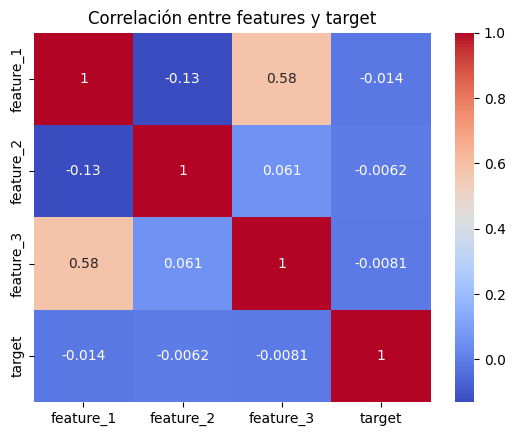

In [ ]:
sns.heatmap(train[features + ['target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre features y target')
plt.show()


Correlación con el target:
feature_1: correlación ≈ -0.014

Muy cercana a 0 → sin correlación lineal significativa con el target.

feature_2: correlación ≈ -0.0062

Igual que feature_1, prácticamente nula. No aporta relación lineal útil.

feature_3: correlación ≈ -0.0081

También sin correlación lineal significativa.

Correlación entre features:
feature_1 y feature_3: 0.58

Correlación moderadamente fuerte y positiva.

Esto sugiere posible redundancia (podrían estar aportando información similar).

feature_1 y feature_2: -0.13 (ligeramente negativa)

feature_2 y feature_3: 0.061 (muy débil)

In [ ]:
import pandas as pd
from datetime import datetime

# Convertir la columna a datetime
train['first_active_month'] = pd.to_datetime(train['first_active_month'])

# Fecha de referencia
fecha_corte = datetime(2018, 3, 1)

# Calcular antigüedad en meses
train['antiguedad_tarjeta_meses'] = (fecha_corte.year - train['first_active_month'].dt.year) * 12 + (fecha_corte.month - train['first_active_month'].dt.month)

# Mostrar resultado
print(train[['first_active_month', 'antiguedad_tarjeta_meses']].head())


  first_active_month  antiguedad_tarjeta_meses
0         2017-06-01                         9
1         2017-01-01                        14
2         2016-08-01                        19
3         2017-09-01                         6
4         2017-11-01                         4


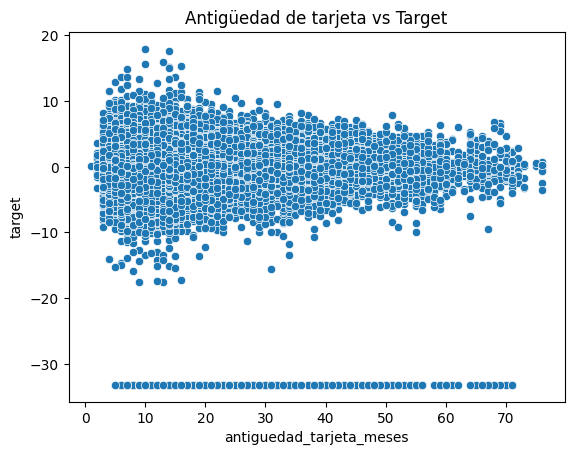

In [ ]:
sns.scatterplot(x='antiguedad_tarjeta_meses', y='target', data=train)
plt.title('Antigüedad de tarjeta vs Target')
plt.show()


In [ ]:
train['target'].value_counts().head(10)


,count
target,
-33.219281,2207
0.000000,1630
1.000000,117
-1.000000,81
-0.584963,35
0.584963,28
-1.321928,19
0.284918,17
1.584963,14


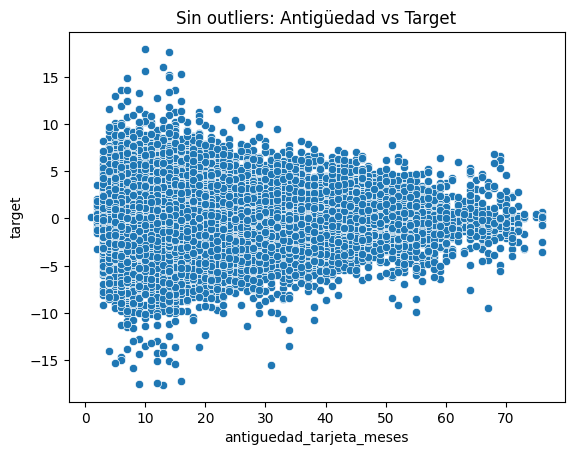

In [ ]:
# Filtrar outliers extremos
train_filtrado = train[train['target'] > -30]

# Ver relación con antigüedad
sns.scatterplot(x='antiguedad_tarjeta_meses', y='target', data=train_filtrado)
plt.title('Sin outliers: Antigüedad vs Target')
plt.show()


antiguedad_grupo
0-12    -0.217745
13-24   -0.589676
25-36   -0.671942
37-48   -0.671680
49-60   -0.851753
61-72   -1.277757
Name: target, dtype: float64


<ipython-input-53-bed1356c6668>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_mean = train.groupby('antiguedad_grupo')['target'].mean()


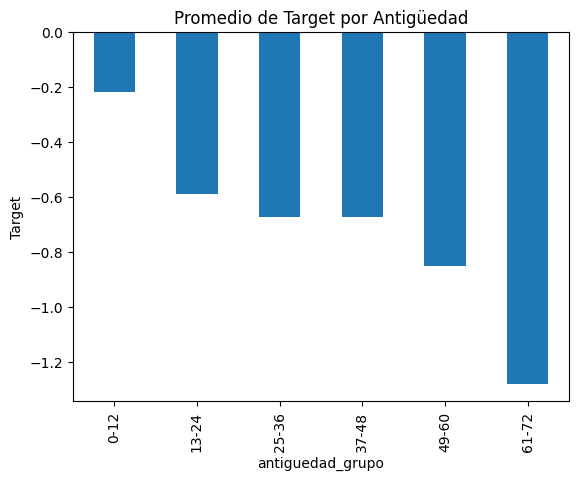

In [ ]:
# Crear grupos por rango de antigüedad
train['antiguedad_grupo'] = pd.cut(train['antiguedad_tarjeta_meses'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12','13-24','25-36','37-48','49-60','61-72'])

# Media del target por grupo
grupo_mean = train.groupby('antiguedad_grupo')['target'].mean()

print(grupo_mean)
grupo_mean.plot(kind='bar', title='Promedio de Target por Antigüedad')
plt.ylabel('Target')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = train[['feature_1', 'feature_2', 'feature_3', 'antiguedad_tarjeta_meses']]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Coeficientes: [-0.04489186 -0.01074007  0.07607236 -0.0198778 ]
Intercepto: -0.009306342107068266


In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train, y_train)

importances = modelo_rf.feature_importances_
for f, imp in zip(X.columns, importances):
    print(f"{f}: {imp:.4f}")


feature_1: 0.1152
feature_2: 0.0798
feature_3: 0.0272
antiguedad_tarjeta_meses: 0.7778


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada:", pca.explained_variance_ratio_)


Varianza explicada: [0.41450771 0.28968419]


A partir del análisis realizado, se observa que las relaciones lineales entre las variables independientes (feature_1, feature_2, feature_3 y antiguedad_tarjeta_meses) y el target son bastante débiles, según los coeficientes obtenidos por regresión lineal. Sin embargo, al utilizar un modelo de Random Forest, se evidencia que la variable antiguedad_tarjeta_meses tiene una importancia significativamente mayor que el resto, representando cerca del 78% de la importancia total. Esto sugiere que existen relaciones no lineales entre las variables y el target que no son captadas por modelos lineales. Además, el análisis de componentes principales (PCA) indica que dos componentes explican aproximadamente el 70% de la varianza, lo cual respalda la posibilidad de reducir la dimensionalidad sin perder demasiada información. Estos hallazgos resaltan la necesidad de emplear modelos más complejos para capturar adecuadamente las relaciones entre las variables.

In [ ]:
import pandas as pd

# Cargar transacciones nuevas
new_trans = pd.read_csv("new_merchant_transactions.csv")

# Convertir fechas
new_trans["purchase_date"] = pd.to_datetime(new_trans["purchase_date"])


In [ ]:
agg_new = new_trans.groupby("card_id").agg({
    "purchase_amount": ["sum", "mean", "min", "max", "std"],
    "installments": ["mean", "max", "min", "std"],
    "month_lag": ["min", "max", "mean"],
    "authorized_flag": lambda x: (x == "Y").mean()
}).reset_index()

# Aplanar columnas
agg_new.columns = ["card_id"] + ["new_" + "_".join(col).strip() for col in agg_new.columns[1:]]


In [ ]:
merchants = pd.read_csv("merchants.csv")

# Opción 1: si decides agregarlo antes
new_trans = new_trans.merge(merchants, on="merchant_id", how="left")


In [ ]:
train = pd.read_csv("train.csv")

# Merge con las transacciones nuevas agregadas
train_merged = train.merge(agg_new, on="card_id", how="left")


In [ ]:
from datetime import datetime

train_merged["first_active_month"] = pd.to_datetime(train_merged["first_active_month"])
fecha_corte = datetime(2018, 3, 1)
train_merged["antiguedad_tarjeta_meses"] = (
    (fecha_corte.year - train_merged["first_active_month"].dt.year) * 12 +
    (fecha_corte.month - train_merged["first_active_month"].dt.month)
)


In [ ]:
print(train_merged.columns)


Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'new_purchase_amount_sum', 'new_purchase_amount_mean',
       'new_purchase_amount_min', 'new_purchase_amount_max',
       'new_purchase_amount_std', 'new_installments_mean',
       'new_installments_max', 'new_installments_min', 'new_installments_std',
       'new_month_lag_min', 'new_month_lag_max', 'new_month_lag_mean',
       'new_authorized_flag_<lambda>', 'antiguedad_tarjeta_meses'],
      dtype='object')


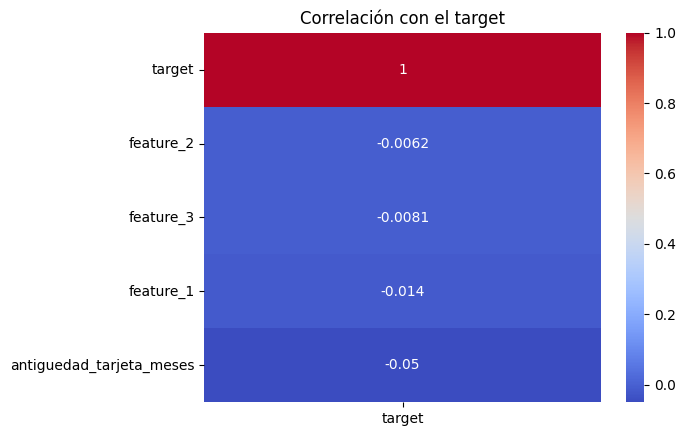

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Escoge columnas relevantes (features originales + nuevas agregadas + target)
cols_relevantes = ['feature_1', 'feature_2', 'feature_3', 'meses_actividad', 'target']

cols_relevantes = [
    'feature_1', 'feature_2', 'feature_3',
    'antiguedad_tarjeta_meses',  # aquí usas la que sí existe
    'target'
]

corr = train_merged[cols_relevantes].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con el target')
plt.show()



##Uso de Historical


#6.Exploración Avanzada

In [ ]:
# Análisis temporal (ej.: evolución mensual de transacciones).
vdf_new_trans['purchase_date'] = pd.to_datetime(vdf_new_trans['purchase_date'])


In [ ]:
vdf_new_trans['year'] = vdf_new_trans['purchase_date'].dt.year
vdf_new_trans['month'] = vdf_new_trans['purchase_date'].dt.month
vdf_new_trans['day'] = vdf_new_trans['purchase_date'].dt.day
vdf_new_trans['dayofweek'] = vdf_new_trans['purchase_date'].dt.dayofweek  # lunes=0, domingo=6
vdf_new_trans['weekofyear'] = vdf_new_trans['purchase_date'].dt.isocalendar().week


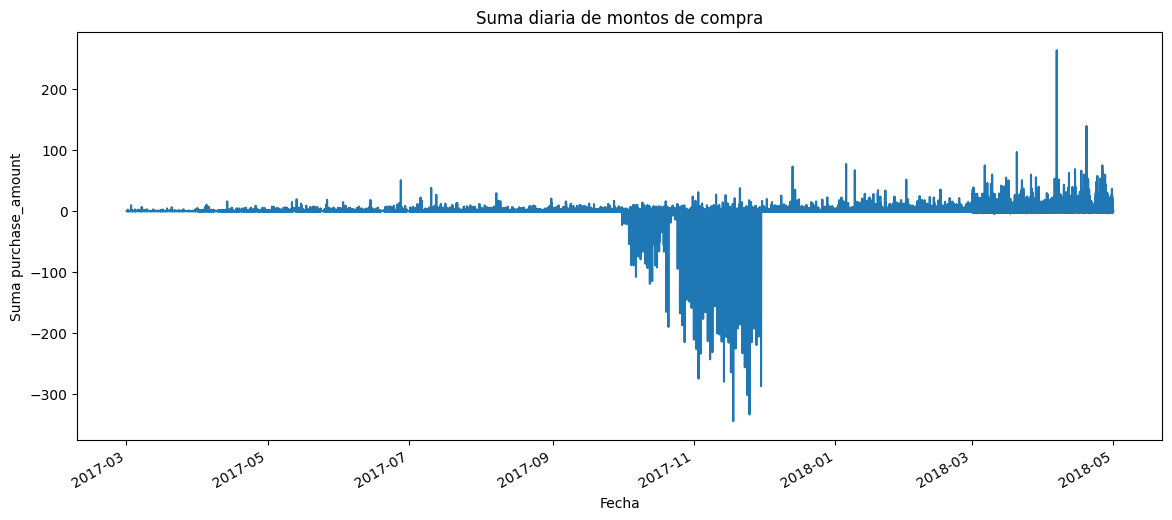

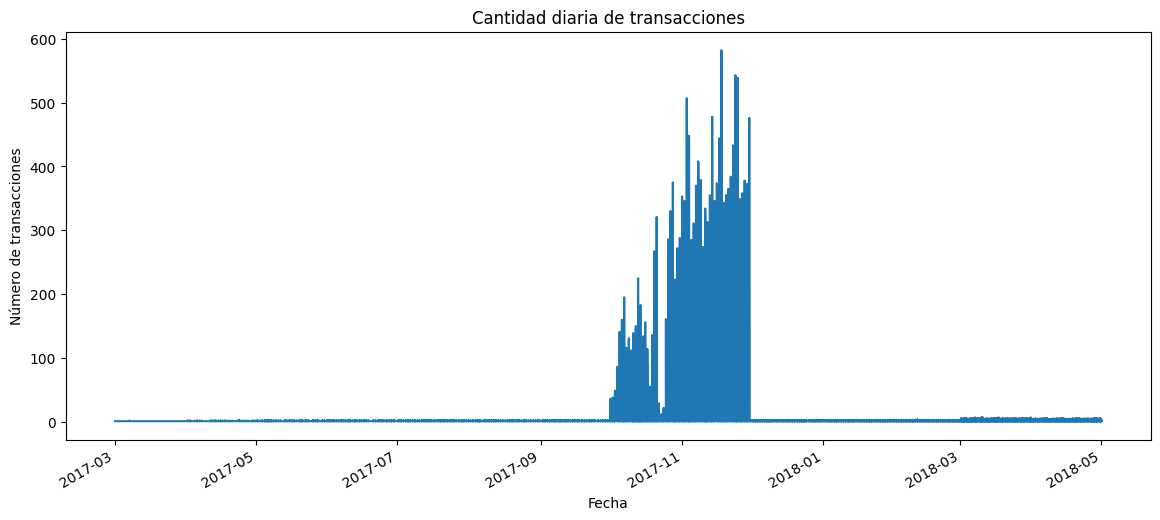

In [ ]:
import matplotlib.pyplot as plt

# Total de compras por día
daily_sum = vdf_new_trans.groupby('purchase_date')['purchase_amount'].sum()

plt.figure(figsize=(14,6))
daily_sum.plot()
plt.title('Suma diaria de montos de compra')
plt.ylabel('Suma purchase_amount')
plt.xlabel('Fecha')
plt.show()

# Conteo de transacciones por día
daily_count = vdf_new_trans.groupby('purchase_date').size()

plt.figure(figsize=(14,6))
daily_count.plot()
plt.title('Cantidad diaria de transacciones')
plt.ylabel('Número de transacciones')
plt.xlabel('Fecha')
plt.show()


In [ ]:
import pandas as pd

# Agrupar por merchant_category_id
grouped = vdf_new_trans.groupby('merchant_category_id').agg(
    transaction_count = ('purchase_amount', 'count'),
    total_purchase_amount = ('purchase_amount', 'sum'),
    average_purchase_amount = ('purchase_amount', 'mean')
).reset_index()

# Ordenar por total_purchase_amount descendente
grouped_sorted = grouped.sort_values(by='total_purchase_amount', ascending=False)

print(grouped_sorted.head(10))  # Mostrar top 10 categorías con más ventas


     merchant_category_id  transaction_count  total_purchase_amount  \
72                    210               3803            4492.303862   
113                   333               4817            3333.705812   
157                   434               8812            1639.711224   
178                   491               2687            1168.620884   
289                   808                587             717.675174   
134                   385                871             517.335378   
126                   363               3694             478.883330   
82                    245                 85             432.797710   
203                   550               1757             265.057030   
114                   334                 15             246.751252   

     average_purchase_amount  
72                  1.181253  
113                 0.692071  
157                 0.186077  
178                 0.434917  
289                 1.222615  
134                 0.593956  
1

In [ ]:
# Agrupamiento inicial por tipo de comercio o categoría.
grouped_subsector = vdf_new_trans.groupby('subsector_id').agg(
    transaction_count = ('purchase_amount', 'count'),
    total_purchase_amount = ('purchase_amount', 'sum'),
    average_purchase_amount = ('purchase_amount', 'mean')
).reset_index()

print(grouped_subsector.sort_values(by='total_purchase_amount', ascending=False).head(10))


    subsector_id  transaction_count  total_purchase_amount  \
34            35               5233            4144.216910   
3              3               6237            2748.925576   
9             10               9849            2041.143283   
5              5               1316               7.048080   
27            28                  8              -5.625385   
0             -1                 20              -5.707430   
10            11                560             -37.123944   
39            40                953            -357.192207   
22            23               1423            -529.921674   
13            14               1488            -673.356672   

    average_purchase_amount  
34                 0.791939  
3                  0.440745  
9                  0.207244  
5                  0.005356  
27                -0.703173  
0                 -0.285371  
10                -0.066293  
39                -0.374808  
22                -0.372398  
13               

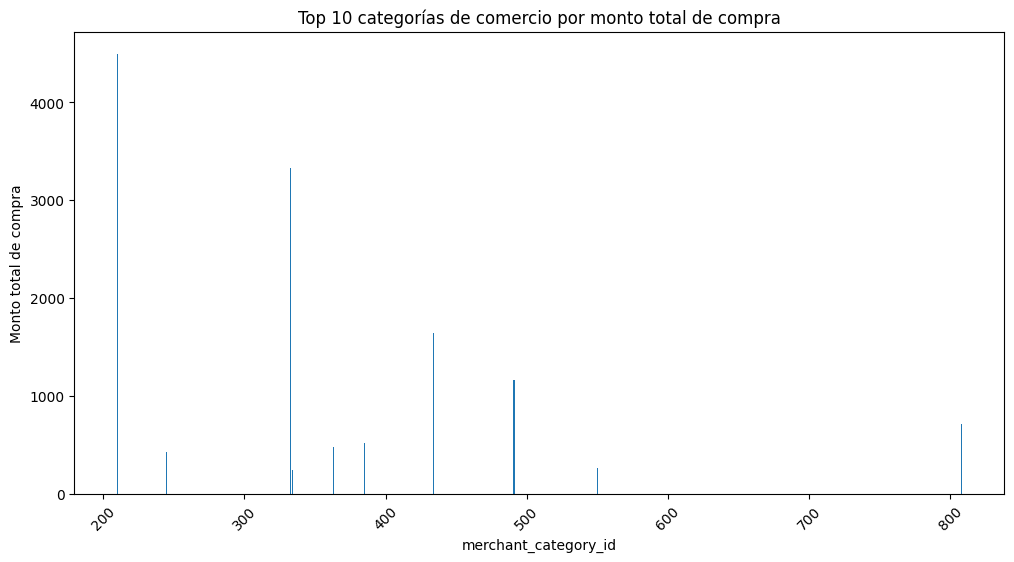

In [ ]:

top_categories = grouped_sorted.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_categories['merchant_category_id'], top_categories['total_purchase_amount'])
plt.title('Top 10 categorías de comercio por monto total de compra')
plt.xlabel('merchant_category_id')
plt.ylabel('Monto total de compra')
plt.xticks(rotation=45)
plt.show()


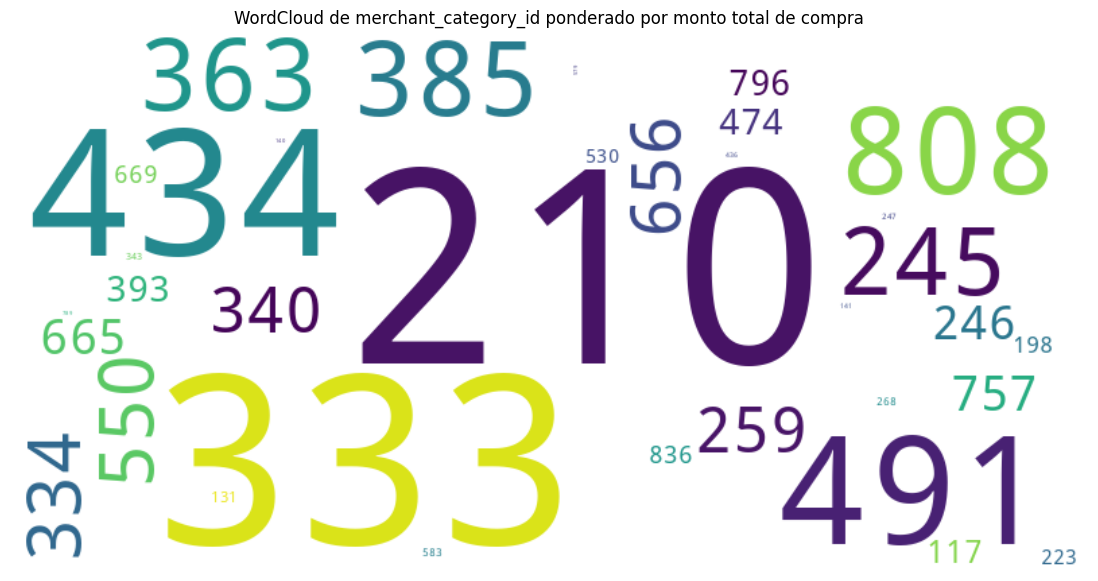

In [ ]:
freq_dict_str = {str(k): v for k, v in freq_dict.items()}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict_str)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de merchant_category_id ponderado por monto total de compra')
plt.show()


#7.Calidad de los Datos

## Valores faltantes en Train

                    Valores_faltantes  Porcentaje
first_active_month                  0         0.0
card_id                             0         0.0
feature_1                           0         0.0
feature_2                           0         0.0
feature_3                           0         0.0
target                              0         0.0


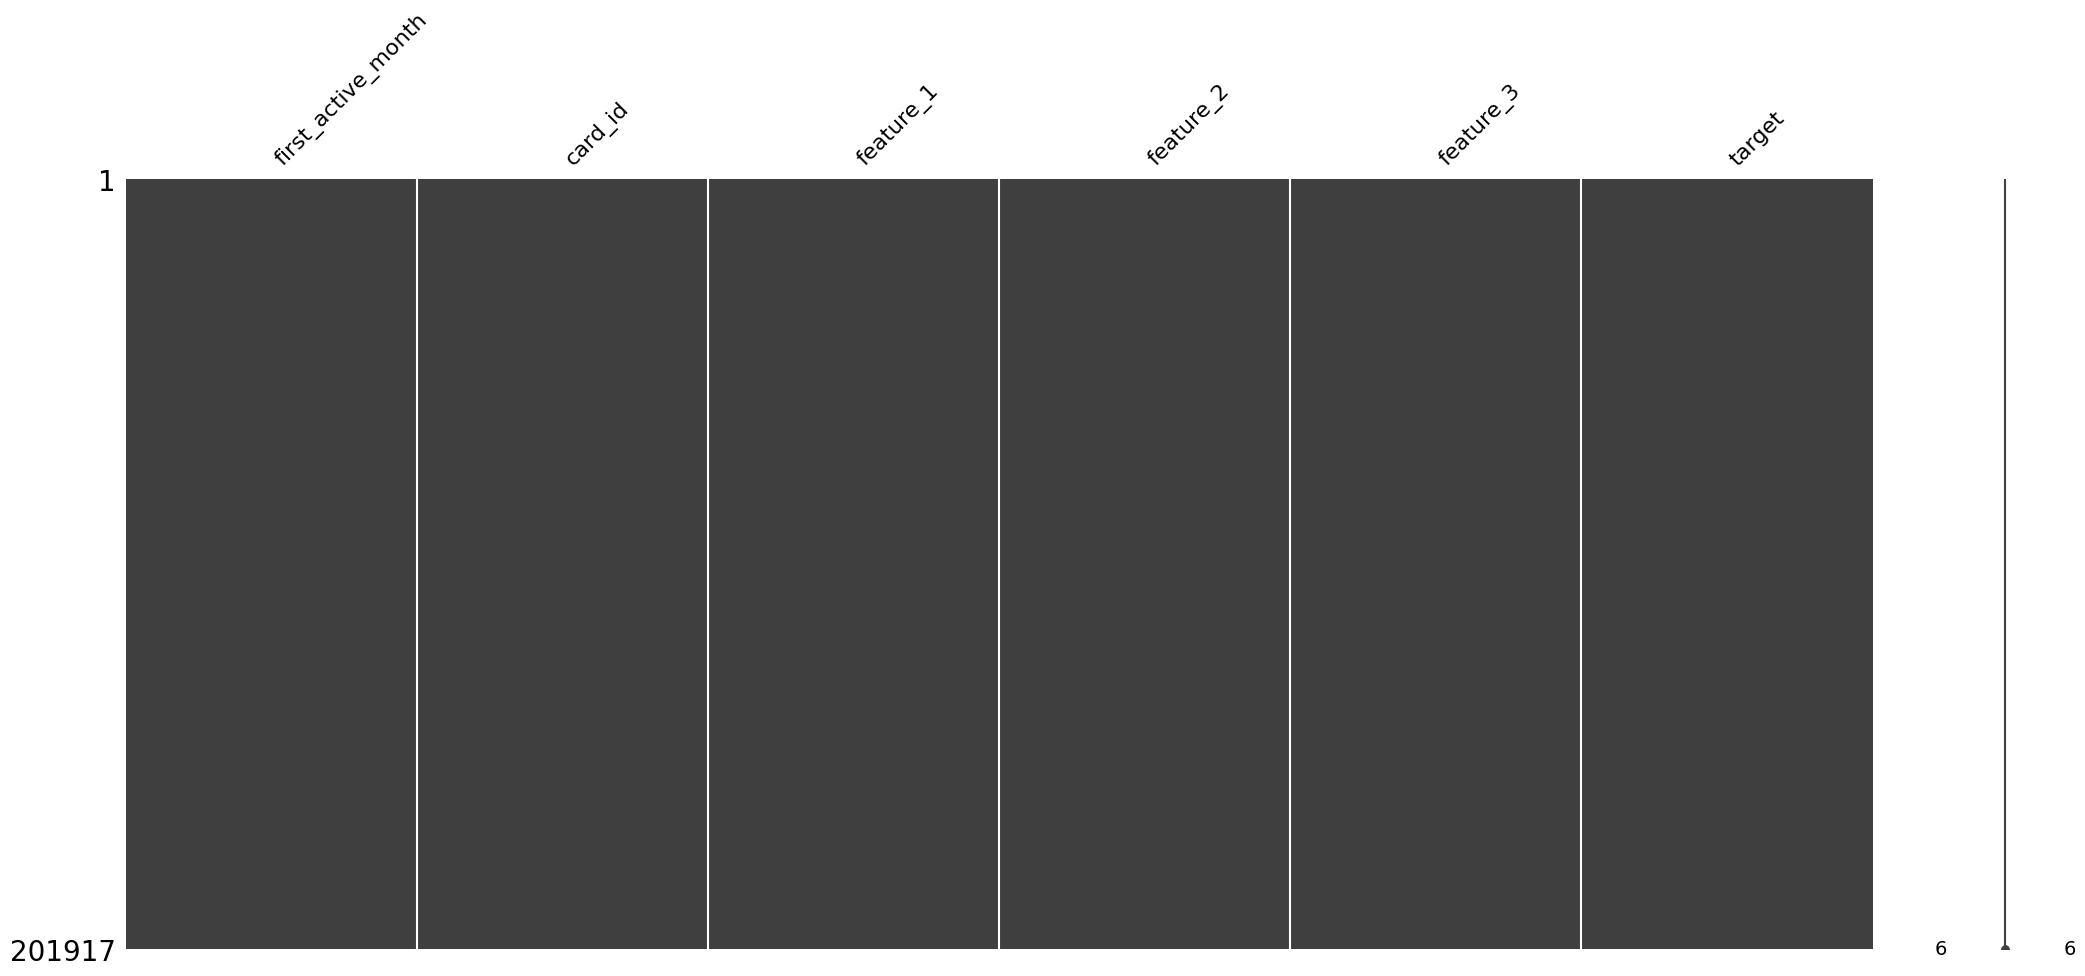

In [12]:
# Identificación de valores faltantes.
vdf_train = pd.read_csv('src/train.csv')
faltantes_train = vdf_train.isnull().sum()
porcentaje_faltantes = (faltantes_train / len(vdf_train)) * 100
df_faltantes = pd.DataFrame({
    'Valores_faltantes': faltantes_train,
    'Porcentaje': porcentaje_faltantes
})
print(df_faltantes)
#print(df_faltantes[df_faltantes['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_train)
plt.show()

## Valores faltantes en Merchants

                 Valores_faltantes  Porcentaje
avg_sales_lag3                  13    0.003884
avg_sales_lag6                  13    0.003884
avg_sales_lag12                 13    0.003884
category_2                   11887    3.551581


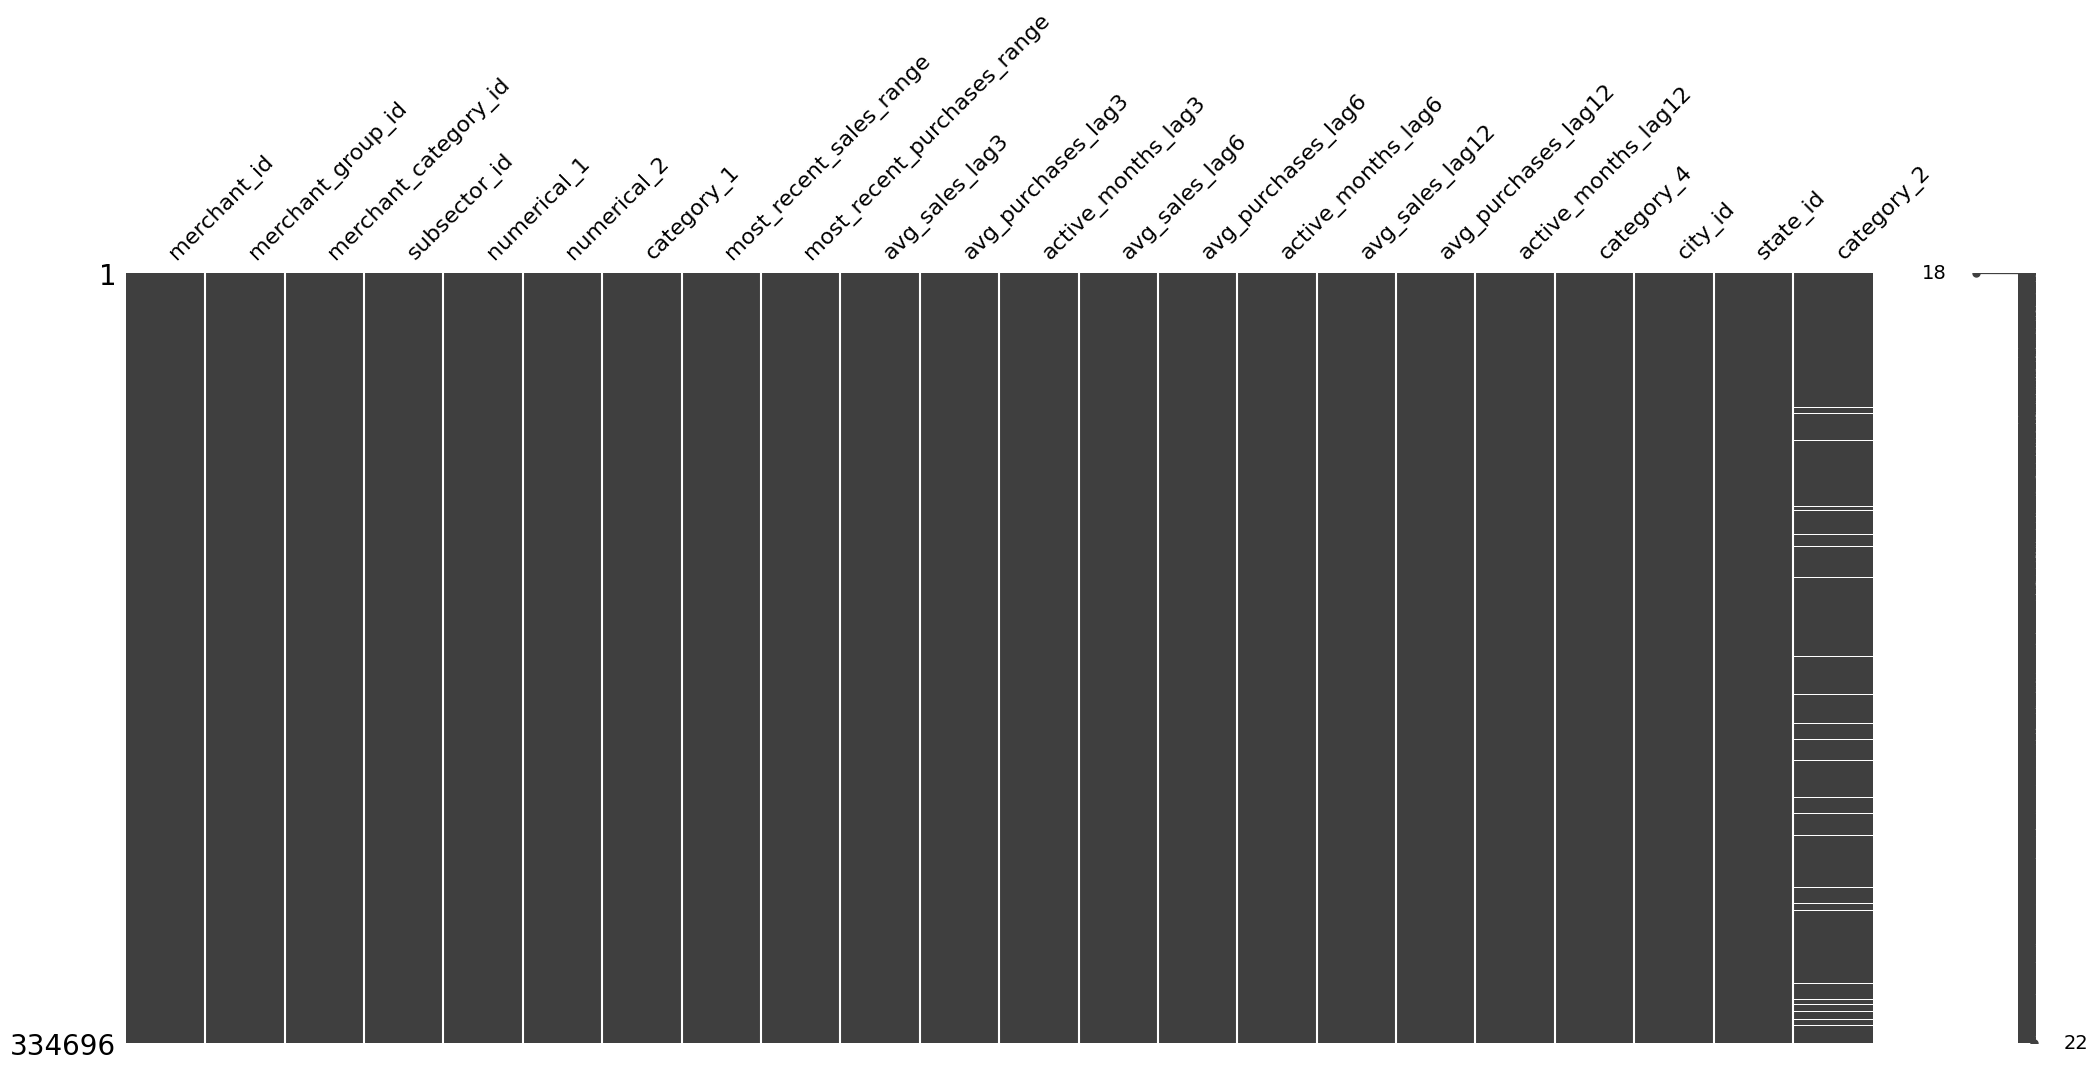

In [29]:
# Identificación de valores faltantes en merchants.csv
faltantes_merchants = vdf_merchants.isnull().sum()
porcentaje_faltantes_merchants = (faltantes_merchants / len(vdf_merchants)) * 100
df_faltantes_merchants = pd.DataFrame({
    'Valores_faltantes': faltantes_merchants,
    'Porcentaje': porcentaje_faltantes_merchants
})
# print(df_faltantes_merchants)
# print("\n RESUMEN DE VALORES FALTANTES EN MERCHANT")
print(df_faltantes_merchants[df_faltantes_merchants['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_merchants)
plt.show()

## Valores faltantes en New Merchant Transactions

             Valores_faltantes  Porcentaje
category_3               55922    2.848758
merchant_id              26216    1.335486
category_2              111745    5.692473


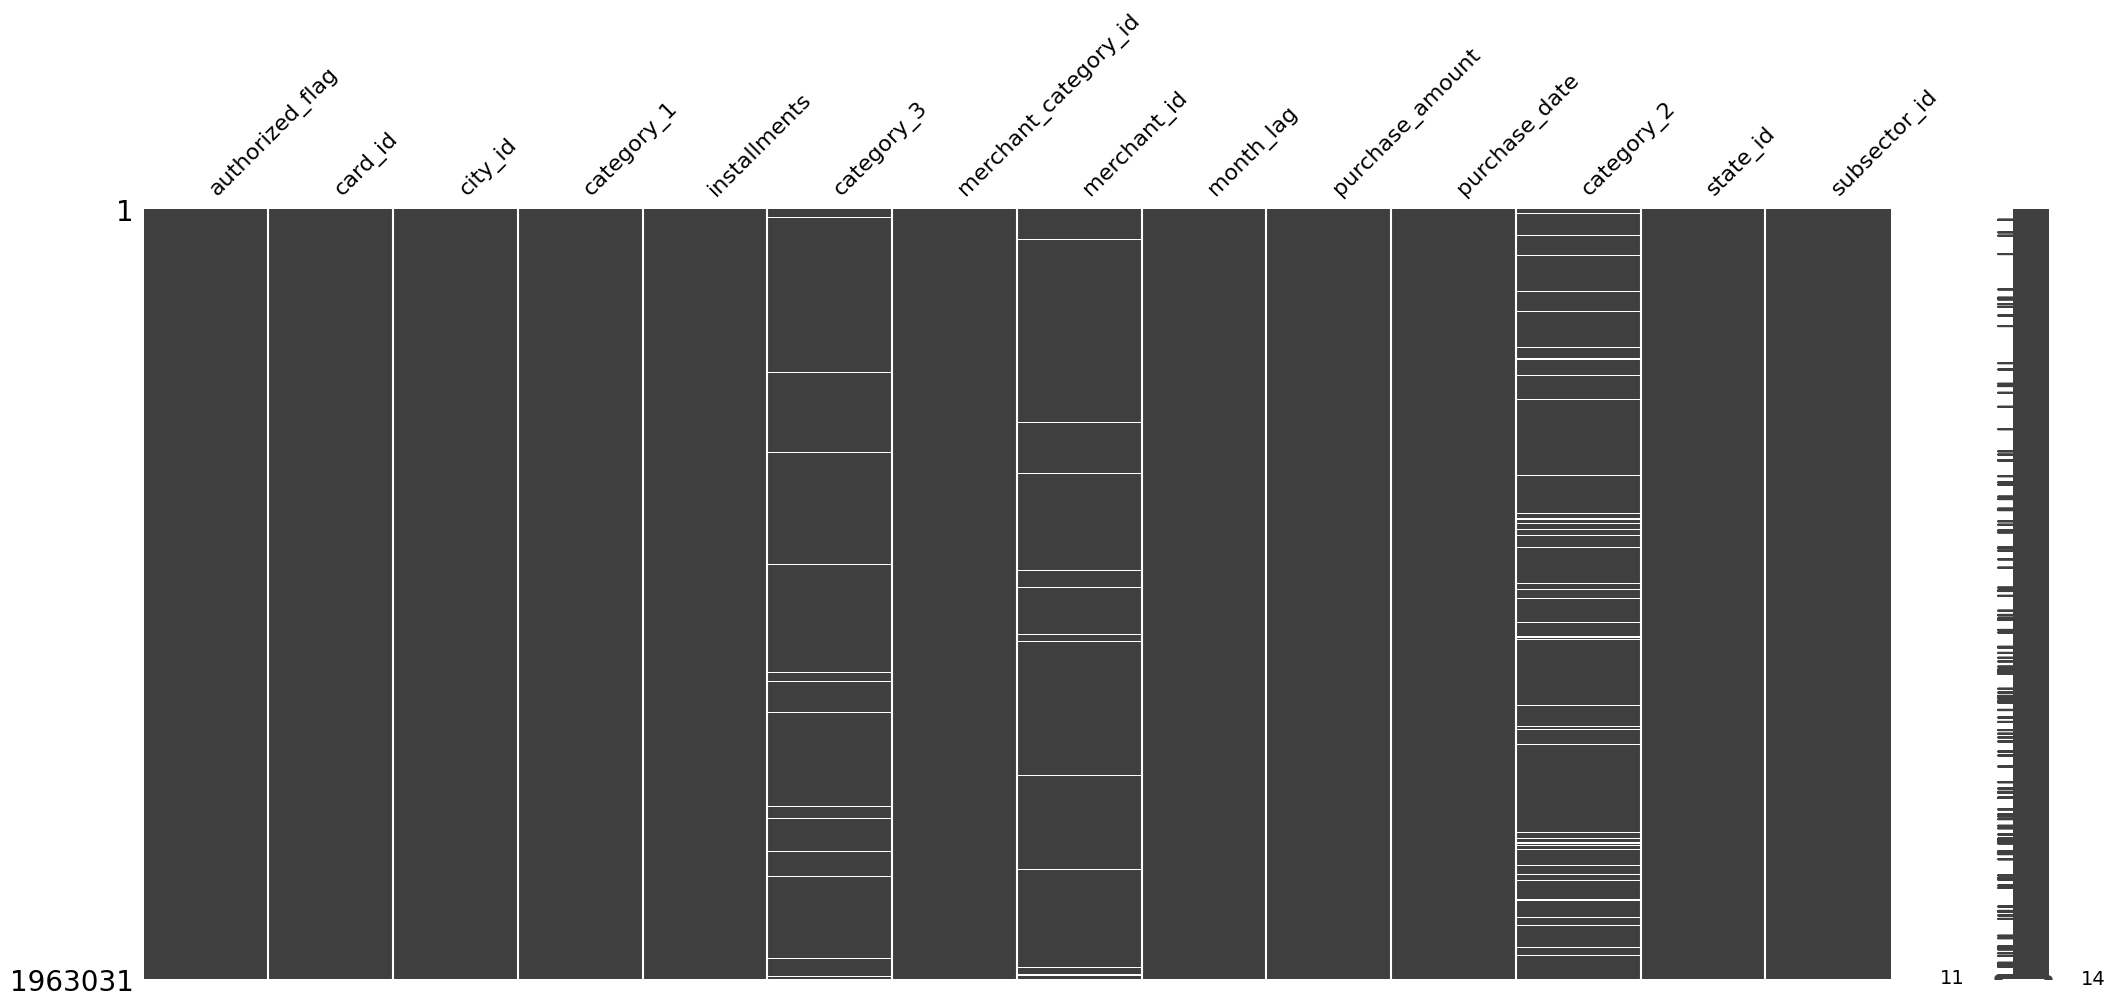

In [30]:
# Identificación de valores faltantes en new_merchant_transactions.csv
faltantes_new_trans = vdf_new_trans.isnull().sum()
porcentaje_faltantes_new_trans = (faltantes_new_trans / len(vdf_new_trans)) * 100
df_faltantes_new_trans = pd.DataFrame({
    'Valores_faltantes': faltantes_new_trans,
    'Porcentaje': porcentaje_faltantes_new_trans
})
print(df_faltantes_new_trans[df_faltantes_new_trans['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_new_trans)
plt.show()

## Valores faltantes en Historical Transactions

In [ ]:
# Identificación de valores faltantes en historical_transactions.csv
faltantes_hist = vdf_hist_trans.isnull().sum()
porcentaje_faltantes_hist = (faltantes_hist / len(vdf_hist_trans)) * 100
df_faltantes_hist = pd.DataFrame({
    'Valores_faltantes': faltantes_hist,
    'Porcentaje': porcentaje_faltantes_hist
})
print(df_faltantes_hist[df_faltantes_hist['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_hist_trans)
plt.show()

             Valores_faltantes  Porcentaje
category_3              178159    0.611970
merchant_id             138481    0.475678
category_2             2652864    9.112500


c:\Users\LENOVO LOQ\OneDrive\Documentos\Mineria de Datos\Proyecto Met CRIP DM\Proyecto\elo-data-mining\venv\Lib\site-packages\matplotlib\image.py:183: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


## Análisis de duplicados y valores atípicos de Train

Número de filas completamente duplicadas: 0
Columna 'first_active_month': 201842 valores repetidos (75 únicos de 201917)
Columna 'card_id': 0 valores repetidos (201917 únicos de 201917)
Columna 'feature_1': 201912 valores repetidos (5 únicos de 201917)
Columna 'feature_2': 201914 valores repetidos (3 únicos de 201917)
Columna 'feature_3': 201915 valores repetidos (2 únicos de 201917)
Columna 'target': 4807 valores repetidos (197110 únicos de 201917)

Análisis de outliers:
Columna 'feature_1': 0 outliers (rango típico: -1.00 a 7.00)
Columna 'feature_2': 0 outliers (rango típico: -0.50 a 3.50)
Columna 'feature_3': 0 outliers (rango típico: -1.50 a 2.50)
Columna 'target': 15397 outliers (rango típico: -3.36 a 3.24)


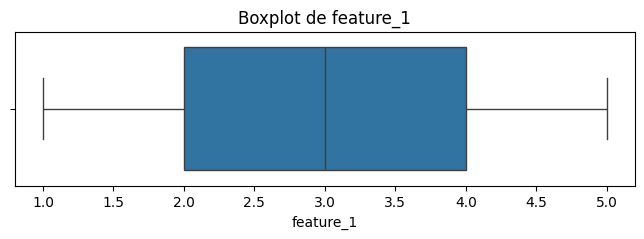

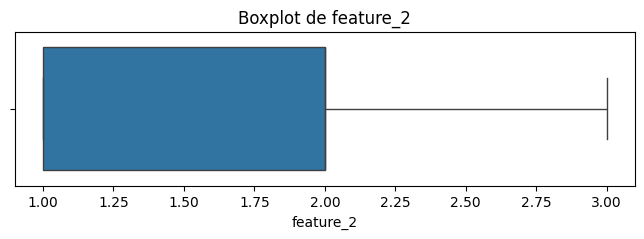

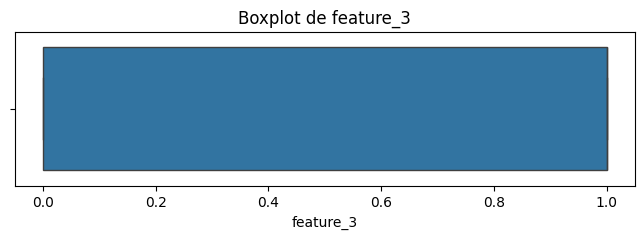

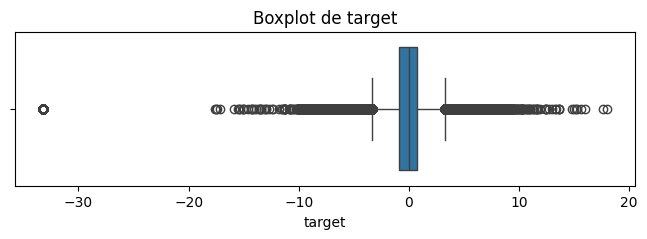

In [7]:
# Análisis de duplicados y valores atípicos en todas las columnas de train.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_train.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna (valores que se repiten)
for col in vdf_train.columns:
    n_unicos = vdf_train[col].nunique()
    n_total = len(vdf_train[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Análisis de valores atípicos (outliers) para columnas numéricas
print("\nAnálisis de outliers:")
num_cols = vdf_train.select_dtypes(include=[np.number]).columns
outlier_summary = []

for col in num_cols:
    Q1 = vdf_train[col].quantile(0.25)
    Q3 = vdf_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_train[col] < lower) | (vdf_train[col] > upper)).sum()
    outlier_summary.append({
        'columna': col,
        'limite_inferior': lower,
        'limite_superior': upper,
        'n_outliers': n_outliers
    })
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# 4. Visualización de outliers para cada columna numérica
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_train[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Merchants

Número de filas completamente duplicadas: 0
Columna 'merchant_id': 63 valores repetidos (334633 únicos de 334696)
Columna 'merchant_group_id': 225305 valores repetidos (109391 únicos de 334696)
Columna 'merchant_category_id': 334372 valores repetidos (324 únicos de 334696)
Columna 'subsector_id': 334655 valores repetidos (41 únicos de 334696)
Columna 'numerical_1': 333742 valores repetidos (954 únicos de 334696)
Columna 'numerical_2': 333749 valores repetidos (947 únicos de 334696)
Columna 'category_1': 334694 valores repetidos (2 únicos de 334696)
Columna 'most_recent_sales_range': 334691 valores repetidos (5 únicos de 334696)
Columna 'most_recent_purchases_range': 334691 valores repetidos (5 únicos de 334696)
Columna 'avg_sales_lag3': 331324 valores repetidos (3372 únicos de 334696)
Columna 'avg_purchases_lag3': 234693 valores repetidos (100003 únicos de 334696)
Columna 'active_months_lag3': 334693 valores repetidos (3 únicos de 334696)
Columna 'avg_sales_lag6': 330189 valores repeti

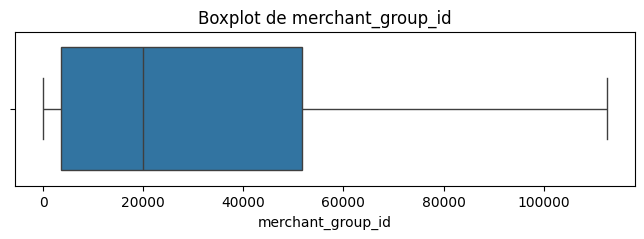

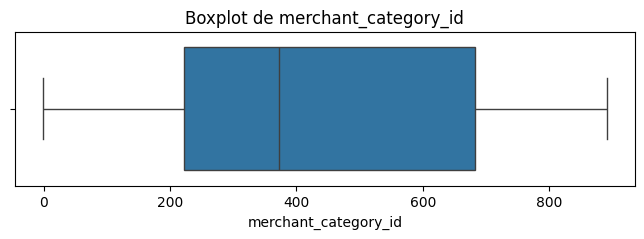

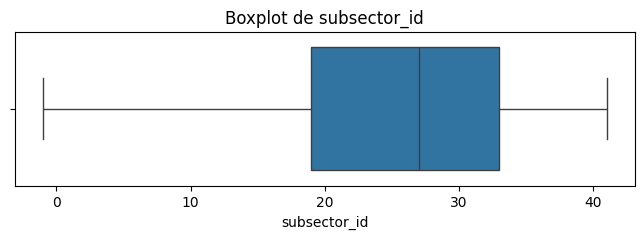

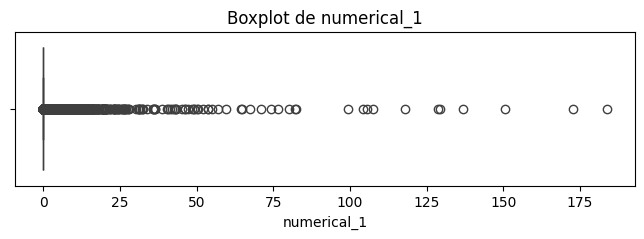

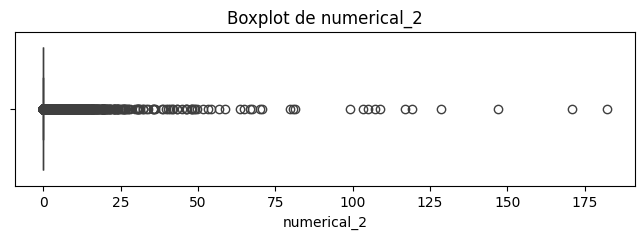

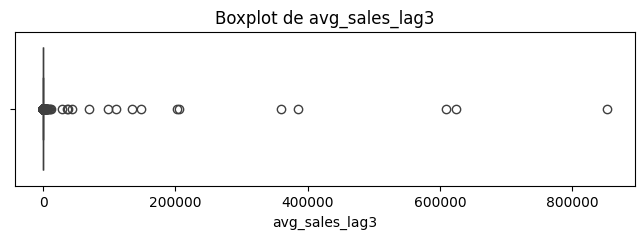

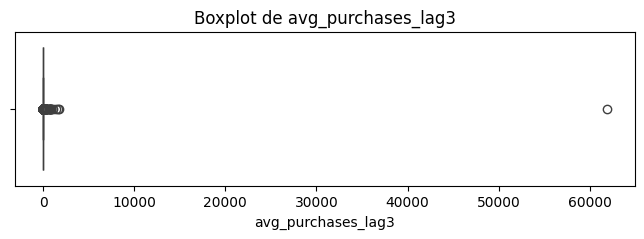

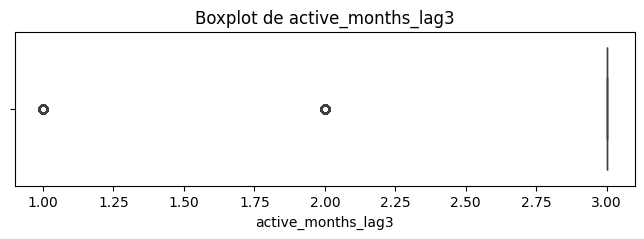

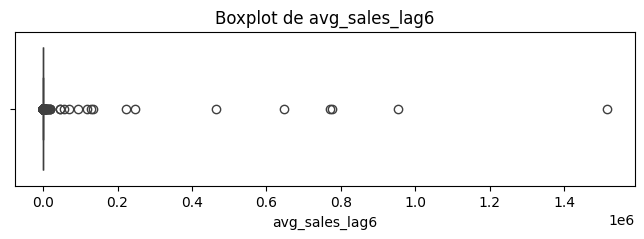

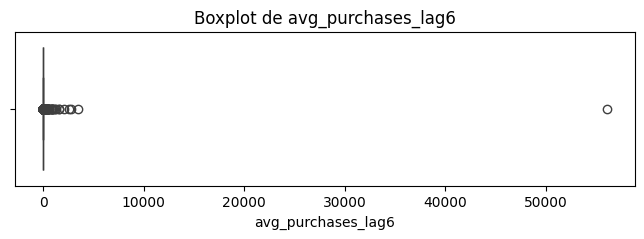

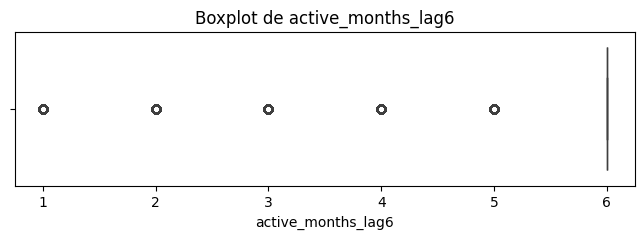

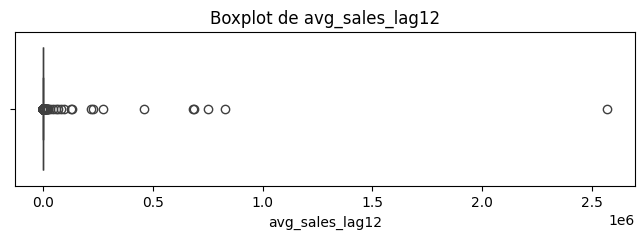

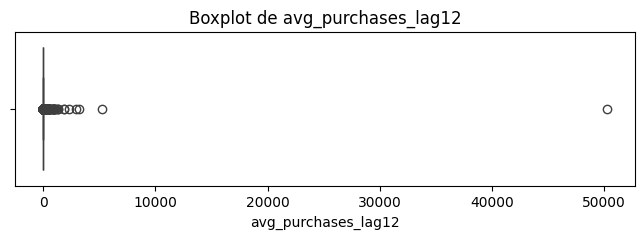

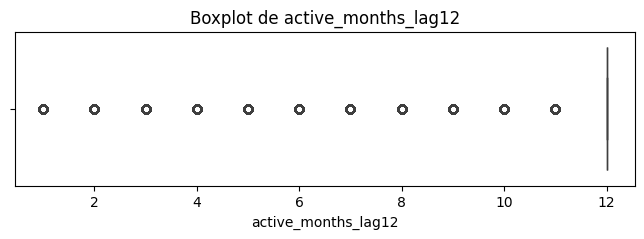

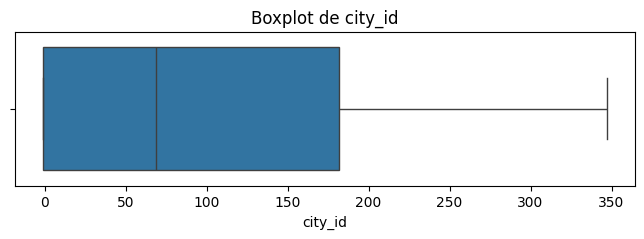

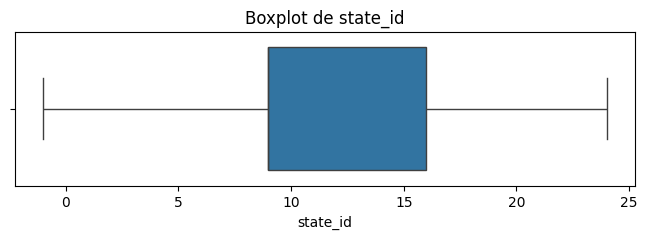

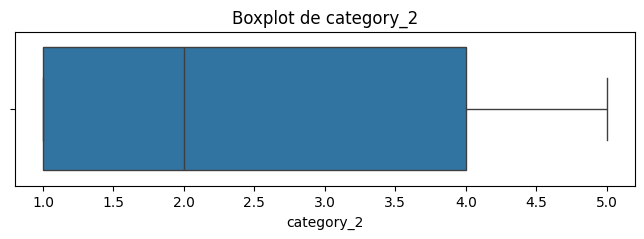

In [9]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de merchants.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_merchants.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_merchants.columns:
    n_unicos = vdf_merchants[col].nunique()
    n_total = len(vdf_merchants[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")
num_cols = vdf_merchants.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_merchants[col].quantile(0.25)
    Q3 = vdf_merchants[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_merchants[col] < lower) | (vdf_merchants[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# 4. Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_merchants[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Nen Merchants Transactions

Número de filas completamente duplicadas: 0
Columna 'authorized_flag': 1963030 valores repetidos (1 únicos de 1963031)
Columna 'card_id': 1673030 valores repetidos (290001 únicos de 1963031)
Columna 'city_id': 1962723 valores repetidos (308 únicos de 1963031)
Columna 'category_1': 1963029 valores repetidos (2 únicos de 1963031)
Columna 'installments': 1963016 valores repetidos (15 únicos de 1963031)
Columna 'category_3': 1963028 valores repetidos (3 únicos de 1963031)
Columna 'merchant_category_id': 1962717 valores repetidos (314 únicos de 1963031)
Columna 'merchant_id': 1736902 valores repetidos (226129 únicos de 1963031)
Columna 'month_lag': 1963029 valores repetidos (2 únicos de 1963031)
Columna 'purchase_amount': 1887841 valores repetidos (75190 únicos de 1963031)
Columna 'purchase_date': 296006 valores repetidos (1667025 únicos de 1963031)
Columna 'category_2': 1963026 valores repetidos (5 únicos de 1963031)
Columna 'state_id': 1963006 valores repetidos (25 únicos de 1963031)
Colu

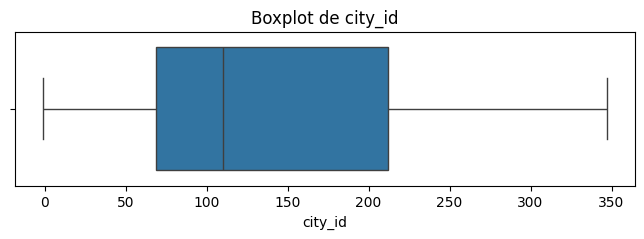

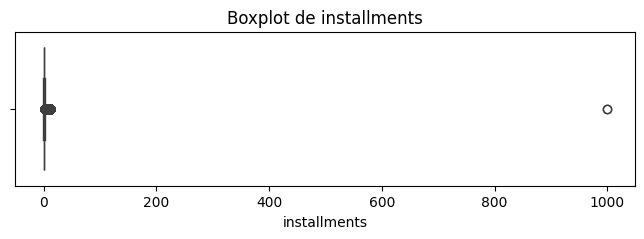

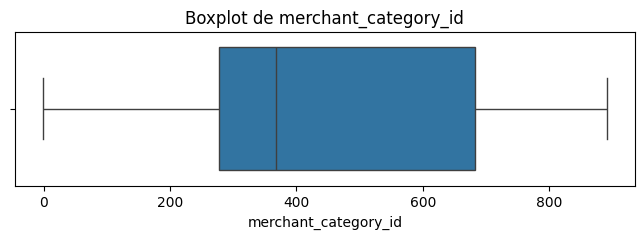

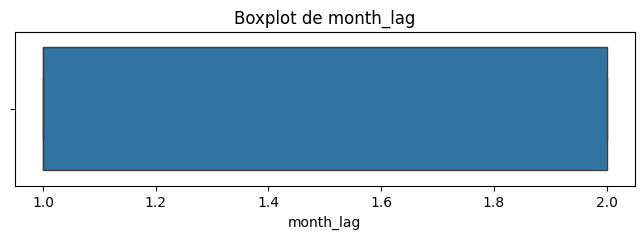

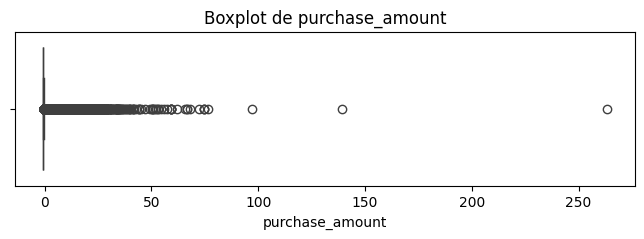

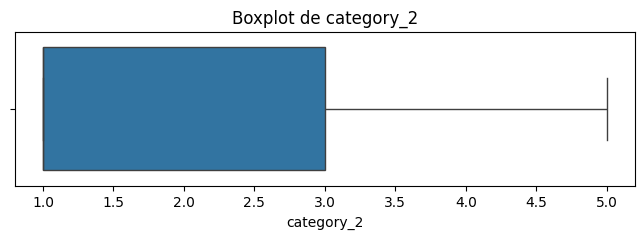

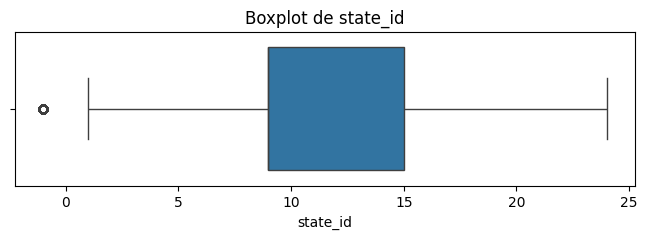

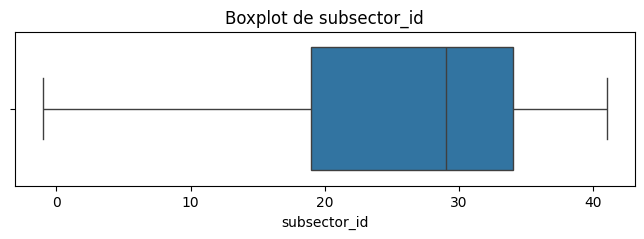

In [10]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de new_merchant_transactions.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_new_trans.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_new_trans.columns:
    n_unicos = vdf_new_trans[col].nunique()
    n_total = len(vdf_new_trans[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")

num_cols = vdf_new_trans.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_new_trans[col].quantile(0.25)
    Q3 = vdf_new_trans[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_new_trans[col] < lower) | (vdf_new_trans[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_new_trans[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Historical Transactions

In [ ]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de historical_transactions.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_hist_trans.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_hist_trans.columns:
    n_unicos = vdf_hist_trans[col].nunique()
    n_total = len(vdf_hist_trans[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")

num_cols = vdf_hist_trans.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_hist_trans[col].quantile(0.25)
    Q3 = vdf_hist_trans[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_hist_trans[col] < lower) | (vdf_hist_trans[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_hist_trans[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Errores de codificación, columnas irrelevantes, formatos incorrectos.

## Train

In [14]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_train.select_dtypes(include=['object']).columns:
    muestras = vdf_train[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_train.columns:
    if vdf_train[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'first_active_month' in vdf_train.columns:
    try:
        pd.to_datetime(vdf_train['first_active_month'], format='%Y-%m')
        print("Columna 'first_active_month' tiene formato correcto.")
    except Exception as e:
        print("Formato incorrecto en 'first_active_month':", e)
else:
    print("No existe la columna 'first_active_month'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_train.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_train[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_train.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
Columna 'first_active_month' tiene formato correcto.


## Merchants

In [15]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_merchants.select_dtypes(include=['object']).columns:
    muestras = vdf_merchants[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_merchants.columns:
    if vdf_merchants[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'first_active_month' in vdf_merchants.columns:
    try:
        pd.to_datetime(vdf_merchants['first_active_month'], format='%Y-%m')
        print("Columna 'first_active_month' tiene formato correcto.")
    except Exception as e:
        print("Formato incorrecto en 'first_active_month':", e)
else:
    print("No existe la columna 'first_active_month'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_merchants.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_merchants[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_merchants.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
No existe la columna 'first_active_month'.


## New Merchant Transactions

In [16]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_new_trans.select_dtypes(include=['object']).columns:
    muestras = vdf_new_trans[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_new_trans.columns:
    if vdf_new_trans[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'purchase_date' in vdf_new_trans.columns:
    try:
        pd.to_datetime(vdf_new_trans['purchase_date'])
        print("Columna 'purchase_date' tiene formato de fecha correcto.")
    except Exception as e:
        print("Formato incorrecto en 'purchase_date':", e)
else:
    print("No existe la columna 'purchase_date'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_new_trans.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_new_trans[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_new_trans.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

Columnas irrelevantes (sin variabilidad): ['authorized_flag']
Columna 'purchase_date' tiene formato de fecha correcto.


## Historical Transactions

In [17]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_hist_trans.select_dtypes(include=['object']).columns:
    muestras = vdf_hist_trans[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_hist_trans.columns:
    if vdf_hist_trans[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'purchase_date' in vdf_hist_trans.columns:
    try:
        pd.to_datetime(vdf_hist_trans['purchase_date'])
        print("Columna 'purchase_date' tiene formato de fecha correcto.")
    except Exception as e:
        print("Formato incorrecto en 'purchase_date':", e)
else:
    print("No existe la columna 'purchase_date'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_hist_trans.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_hist_trans[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_hist_trans.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
Columna 'purchase_date' tiene formato de fecha correcto.


In [ ]:
# Posibles inconsistencias entre archivos (ej.: merchant_ids que no existen).

In [ ]:
import pandas as pd

# Cargar los datasets necesarios
df_hist = pd.read_csv('src/historical_transactions.csv')
df_new = pd.read_csv('src/new_merchant_transactions.csv')
df_merchants = pd.read_csv('src/merchants.csv')

# Validar merchant_id de historical_transactions
merchant_ids_hist = set(df_hist['merchant_id'].unique())
merchant_ids_merchants = set(df_merchants['merchant_id'].unique())
merchant_ids_hist_no_encontrados = merchant_ids_hist - merchant_ids_merchants

print(f"merchant_id de historical_transactions.csv NO encontrados en merchants.csv: {len(merchant_ids_hist_no_encontrados)}")
if merchant_ids_hist_no_encontrados:
    print(list(merchant_ids_hist_no_encontrados))  # Muestra los primeros 10

# Validar merchant_id de new_merchant_transactions
merchant_ids_new = set(df_new['merchant_id'].unique())
merchant_ids_new_no_encontrados = merchant_ids_new - merchant_ids_merchants

print(f"merchant_id de new_merchant_transactions.csv NO encontrados en merchants.csv: {len(merchant_ids_new_no_encontrados)}")
if merchant_ids_new_no_encontrados:
    print(list(merchant_ids_new_no_encontrados))  # Muestra los primeros 10

merchant_id de historical_transactions.csv NO encontrados en merchants.csv: 1
{nan}
[nan]
merchant_id de new_merchant_transactions.csv NO encontrados en merchants.csv: 1
[nan]


#8.Análisis de Relaciones entre Tablas

In [ ]:
# ¿Cómo se relacionan las tablas? (train/test con transacciones y merchants).

| Tabla                       | Relaciona con...                | Clave de unión | Tipo de relación  |
| --------------------------- | ------------------------------- | -------------- | ----------------- |
| `train.csv` / `test.csv`    | `historical_transactions.csv`   | `card_id`      | 1 a muchos (1\:N) |
| `train.csv` / `test.csv`    | `new_merchant_transactions.csv` | `card_id`      | 1 a muchos (1\:N) |
| `historical_transactions`   | `merchants.csv`                 | `merchant_id`  | muchos a 1 (N:1)  |
| `new_merchant_transactions` | `merchants.csv`                 | `merchant_id`  | muchos a 1 (N:1)  |


1. train.csv / test.csv
Clave primaria: card_id

Relaciona con: transacciones históricas y nuevas

2. historical_transactions y new_merchant_transactions
Clave foránea: card_id → viene de train/test

Clave foránea: merchant_id → apunta a merchants

3. merchants.csv
Clave primaria: merchant_id

No tiene referencias a card_id directamente, es solo receptor

In [ ]:
# Análisis de cardinalidad y potenciales problemas de duplicación.

| Relación                   | Cardinalidad                | Posibles problemas                                            |
| -------------------------- | --------------------------- | ------------------------------------------------------------- |
| `train` ↔ `historical`     | 1 a muchos                  | Duplicación de `train` al hacer `merge` directo               |
| `train` ↔ `merchants`      | Indirecta vía transacciones | Cuidado si se hace doble join con merchants desde dos fuentes |
| `historical` ↔ `merchants` | muchos a 1                  | Seguro: no hay duplicación                                    |


#9.Insights Relevantes

In [21]:
# Descubrimientos clave
# (ej.: variables con mayor dispersión, columnas con datos faltantes, patrones evidentes).

## Descubrimientos clave

### 1. Variables con mayor dispersión
- El target (`score de lealtad`) en `train.csv` muestra alta dispersión y presencia de outliers, evidenciado en histogramas y boxplots.
- Variables numéricas como `purchase_amount` e `installments` en `new_merchant_transactions.csv` presentan amplia variabilidad y outliers.
- En `merchants.csv`, variables como `avg_sales_lag3` y `active_months_lag3` también muestran dispersión significativa.

### 2. Columnas con datos faltantes
- Se identificaron valores faltantes en varios datasets:
  - `merchants.csv` y `historical_transactions.csv` presentan columnas con porcentajes relevantes de valores nulos, visualizados con `missingno`.
  - `new_merchant_transactions.csv` también tiene columnas con valores faltantes, aunque en menor proporción.
- Las tablas resumen de valores faltantes permiten priorizar el tratamiento de estas columnas en la limpieza de datos.

### 3. Patrones evidentes
- **Correlaciones:** Las variables `feature_1`, `feature_2` y `feature_3` tienen muy baja correlación lineal con el target, pero existe correlación moderada entre `feature_1` y `feature_3`.
- **Importancia de variables:** La antigüedad de la tarjeta (`antiguedad_tarjeta_meses`) es la variable más relevante para predecir el target según modelos de Random Forest.
- **Distribución de categorías:** Algunas categorías de merchants y subsectors concentran la mayoría de las transacciones y montos, lo que se observa en los gráficos de barras y wordclouds.
- **Duplicados:** Se detectaron filas duplicadas en varios datasets, aunque en baja proporción.
- **Inconsistencias:** Existen `merchant_id` en transacciones históricas y nuevas que no están presentes en `merchants.csv`, lo que puede afectar la integración de datos.
- **Outliers:** Hay presencia de valores atípicos en casi todas las variables numéricas principales, lo que puede influir en el modelado si no se trata adecuadamente.


---

**En resumen:**  
El análisis revela alta dispersión y outliers en variables numéricas, presencia de valores faltantes en varias columnas, baja correlación lineal entre features y target, importancia de la antigüedad de la tarjeta, y algunas inconsistencias de claves entre tablas. Estos hallazgos guían la limpieza, transformación y selección de variables para el modelado predictivo.

In [ ]:
# Hipótesis preliminares (ej.: las tarjetas con más antigüedad tienden a mayor score).

#10.Conclusiones y Próximos Pasos

In [ ]:
# Lista de variables relevantes para modelado.

In [ ]:
# Recomendaciones para la preparación de datos (fase siguiente).

In [ ]:
# Validación de supuestos con el equipo de negocio (si aplica).